<a name = "inicio"></a>

***

<div style="font-size: 30px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Prueba evaluación continua (PEC2) </div>

<table>
  <tr>
    <td>
<div>
<img src="attachment:image-2.png" width="135"/>
<td>&nbsp;</td><td>&nbsp;</td>
</div>
    </td>
    <td>
<div>
<img src="attachment:image-3.png" width="350"/>
</div>       
</td>
  </tr>
<table>
    
<u>Índice de contenidos<u>:

1. [Instrucciones de la prueba](#topic1)
2. [Bloque 1: Ejercicios básicos de la prueba](#topic2)
3. [Bloque 2: Ejercicios intermedios de la prueba](#topic3)

***

# Bloque 1: Ejercicios básicos de la prueba <a id="topic2"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

### 01 Ejercicio [1.5 puntos]

Un analista de deportes quiere saber si existe una relación entre la variable número de bateos que realiza un equipo de béisbol (`numero_bateos`) y la variable dependiente, número de runs que consigue, (`runs`). Para ello contáis con la base de datos $\tt beisbol$ que se aporta abajo sobre diferentes equipos de la Major League Baseball (MLB) de los EE.UU. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos
2. Análisis de la existencia de relación lineal entre las variables
3. Estimación de un modelo de regresión lineal simple entre las variables
4. Interpretación de las salidas de estimación de un modelo de regresión lineal simple

In [53]:
# Base de datos beisbol MLB
equipos = c("Texas", "Boston", "Detroit", "Kansas", "St.", "New_S.", "New_Y.", "Milwaukee", "Colorado", "Houston", "Baltimore", "Los_An.", "Chicago", "Cincinnati", "Los_P.", "Philadelphia", "Chicago", "Cleveland", "Arizona", "Toronto", "Minnesota", "Florida", "Pittsburgh", "Oakland", "Tampa", "Atlanta", "Washington", "San.F", "San.I", "Seattle")
numero_bateos = c(5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421)
runs = c(855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654 , 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556)
beisbol = data.frame(equipos, numero_bateos, runs)

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [54]:
# Clases de la base de datos
class(beisbol)

[1] "data.frame"

In [55]:
# Dimensiones de la base de datos
dim(beisbol)

[1] 30  3

In [56]:
# Visualizamos la base de datos seleccionada
head(beisbol)

,equipos,numero_bateos,runs
,<chr>,<dbl>,<dbl>
1,Texas,5659,855
2,Boston,5710,875
3,Detroit,5563,787
4,Kansas,5672,730
5,St.,5532,762
6,New_S.,5600,718


In [57]:
# Analizamos el numero de null values en cada columna
colSums(is.na(beisbol))

equipos numero_bateos          runs 
            0             0             0

Como se puede apreciar no hay valores nulos asi que no hay que gestionarlos


In [58]:
# Realizamos el análisis exploratorio de las variables utilizadas
summary(beisbol)

   equipos          numero_bateos       runs      
 Length:30          Min.   :5417   Min.   :556.0  
 Class :character   1st Qu.:5448   1st Qu.:629.0  
 Mode  :character   Median :5516   Median :705.5  
                    Mean   :5524   Mean   :693.6  
                    3rd Qu.:5575   3rd Qu.:734.0  
                    Max.   :5710   Max.   :875.0  

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

Antes de realizar ningún tipo de modelización tenéis que aseguraros que podemos aplicar un modelo de regresión entre las variables consideradas. Para ello, tiene que existir una relación entre las mismas. En caso contrario NO podremos realizar ningún tipo de análisis de regresión utilizando dichas vraiables.


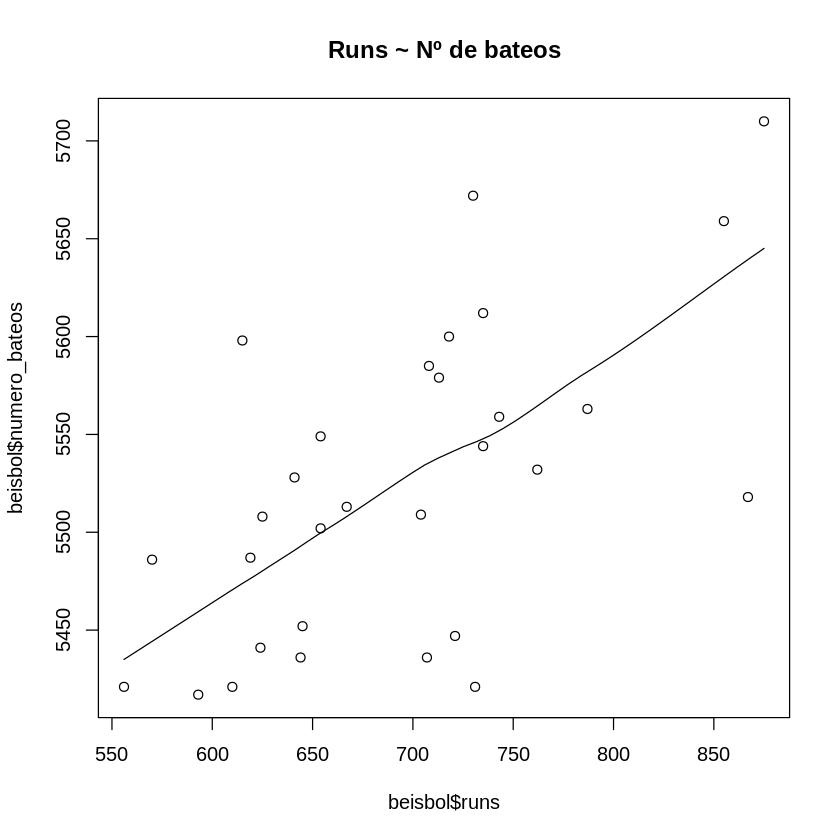

In [59]:
scatter.smooth(x = beisbol$runs, y = beisbol$numero_bateos, main = "Runs ~ Nº de bateos")


**<u>Interpretación resultados</u>.-** Podemos observar en el gráfico de dispersión que no existe un patrón aleatorio, es decir, que no nos aparece todo el cuadrado lleno de puntos colocados de manera aleatoria. Luego, este hecho, es una evidencia de que podría existir una relación entre las variables. Como siempre, tenemos que confirmarlo con las evidencias numércias y contrastadas.

In [60]:
# Evidencia numérica

cor(beisbol$runs, beisbol$numero_bateos)

[1] 0.610627

In [61]:
# Evidencia contrastada

cor.test(beisbol$runs, beisbol$numero_bateos)


	Pearson's product-moment correlation

data:  beisbol$runs and beisbol$numero_bateos
t = 4.0801, df = 28, p-value = 0.0003388
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3209675 0.7958231
sample estimates:
     cor 
0.610627 


**<u>Interpretación resultados</u>.-** El $p$-valor obtenido es muy pequeño: $0.0003388$ siendo $< \alpha = 0.05$, luego tenemos que rechazar la hipótesis nula de que la correlación sea igual $0$, es decir, los runs que realiza cada equipo con el numero de bateos que consigue SI están correlacionados. En particular, el coeficiente de correlación sería igual a $0.610627$ determinando que existe una relación directa. Es decir, a mayor cantidad de runs, el equipo obtendra un numero mayor de bateos y viceversa. Por tanto, SI podemos realizar la estimación de un modelo de regresión lineal entre dichas variables.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [62]:
# Estimación del modelo de regresión lineal simple incluyendo el dataset como parámetro

modelo <- lm(runs ~ numero_bateos, data = beisbol)
modelo


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Coefficients:
  (Intercept)  numero_bateos  
   -2789.2429         0.6305  


**<u>Interpretación resultados</u>.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = -2789.2429$ y $\beta_1 = 0.6305$. La interpretación de los parámetros $\beta_0$ y $\beta_1$ en un modelo de regresión lineal simple donde la variable dependiente es el numero de runs que consigue cada equipo y la variable independiente es el numero de bateos que realiza es fundamental para comprender la relación entre estas dos variables. En este caso, $\beta_0=-2789.2429$ representa el valor de la intersección con el eje y, lo que implica el numero de runs cuando el numero de bateos es 0. Este valor puede ser interpretado como el coeficiente del nivel de runs base o de inicio sin considerar el numero de bateos que ha realizado ese equipo. Por otro lado, $\beta_1=0.6305$ es el coeficiente de la pendiente y muestra cómo cambia el nivel de runs en función de el numero de bateos. Este coeficiente positivo sugiere una relación directa y proporcional entre ambas variables, donde un mayor numero de bateos se asocia con conseguir un numero mayor de runs.

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

4.1 Ouput de la regresion


In [63]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal

output <- summary(modelo)
output


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2789.2429   853.6957  -3.267 0.002871 ** 
numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


**<u>Interpretación resultados</u>.-**  Veamos cada uno de los elementos que presenta el objeto `output`. Los valores de los **coeficientes de regresión** ya los hemos comentado (columna `Estimate`). Los **errores típicos de los parámetros estimados** $\hat{\beta}_{0}$ y $\hat{\beta}_{1}$ se encuentran en la columna `Std Error` de la salida anterior. En este caso, sus valores son $853.6957$ y $0.1545$ respectivamente.

La columna `t value` contiene el estadístico `t`, es decir, cociente entre cada estimador y su error típico. Estos cocientes son la base para llevar a cabo los **contrastes de significatividad individual sobre los parámetros estimados** cuya hipótesis nula y alternativa son $H_0:\hat{\beta}_{0}=0$ y $H_0:\hat{\beta}_{1}=0$. Los correspondientes p-valores aparecen en la columna `Pr(>|t|)`. En este ejemplo, es muy pequeño (menor que el nivel de signifcación por defecto $5\%$) en el caso de la variable numero de bateos. Luego, se rechazaría la hipótesis nula y por tanto, sería estadísticamente significativo el coeficiente estimado para $\hat{\beta}_{1}$.

El estimador de la **desviación típica de los errores** $\sigma$ aparece como `Residual standard error` y su valor en este caso es igual a $66.47$ siendo $28$ el número de grados de libertad `degrees of freedom` que se calcula como el número total de obervaciones - número de parámetros estimados = $30 - 2 = 28$. Finalmente, aparecen otra serie de indicadores que veremos a continuación con más detalle. En resumen, el modelo de regresión lineal simple para la ecuación de salarios una vez estimados los coeficientes de regresión quedaría del siguiente modo:

\begin{align*}
runs_{i}&=-2789.2429 + 0.6305 * nbateos_{i}+\hat \epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

4.2 Coeficientes de regresion estimados

Vamos a <u>extraer los coeficientes de regresión</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

* Extracción **directa** de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ utilizando el objeto `output`.


* Extracción de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})$ con la **función** $\tt coef$ sobre el `modelo` estimado.


* **Cálculo manual** de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ a partir de la siguiente **ecuación formal:**

\begin{align*}
\hat{\beta}_{1}&=\frac{Cov(x,y)}{Var(x)}\\
\hat{\beta}_{0}&=\bar{y}-\hat{\beta}_{1}\bar{x}
\end{align*}

In [64]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)

output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2789.24289,853.6957215,-3.267256,0.0028705508
numero_bateos,0.63055,0.1545414,4.080136,0.0003388351


In [65]:
# Extracción de los coeficientes de regresión con la función `coef`

bhat <- coef(modelo)
bhat

(Intercept) numero_bateos 
  -2789.24289       0.63055

In [66]:
# Cálculo manual de b1
# Obtenemos la covarianza entre x e y
covxy <- cov(beisbol$runs, beisbol$numero_bateos)
covxy

[1] 4022.724

In [67]:
# Obtenemos la varianza entre x e y
varx <- var(beisbol$numero_bateos)
varx

[1] 6379.707

In [68]:
# Aplicamos la ecuación b1 = covxy/varx
b1 <- covxy/varx
b1

[1] 0.63055

In [69]:
# Cálculo manual de b0
# Obtenemos la media de la variable y
meany <- mean(beisbol$runs)
meany

[1] 693.6

In [70]:
# Obtenemos la media de la variable x
meanx <- mean(beisbol$numero_bateos)
meanx

[1] 5523.5

In [71]:
# Aplicamos la ecuación b0= meany-b1*meanx
b0 <- meany-b1*meanx
b0

[1] -2789.243

**<u>Interpretación resultados</u>.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = -2572.6311$ y $\beta_1 = 0.5913$. La interpretación de los parámetros $\beta_0$ y $\beta_1$ en un modelo de regresión lineal simple donde la variable dependiente es el numero de bateos y la variable independiente es el numero de runs que consigue es fundamental para comprender la relación entre estas dos variables. En este caso, $\beta_0=-2572.6311$ representa el valor de la intersección con el eje y, lo que implica el numero de runs cuando el numero de bateos es 0. Este valor puede ser interpretado como el coeficiente del nivel de runs base o de inicio sin considerar el numero de bateos que ha realizado ese equipo. Por otro lado, $\beta_1=0.5913$ es el coeficiente de la pendiente y

4.3 Valores ajustados de la variable dependiente

Vamos a <u>extraer los valores ajustados</u> de la variable dependiente a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** de los valores ajustados de nuestra variable dependiente $\hat{y}$ sobre el `modelo`estimado.


+ Extracción de los valores ajustados de nuestra variable dependiente $\hat{y}$ con la **función** $\tt fitted$ sobre el `modelo`estimado.


+ **Cálculo manual** de los valores ajustados de nuestra variable dependiente $\hat{y}$ a partir de la siguiente **ecuación formal:**

\begin{align*}
\hat y_i&=\hat \beta_{0}+\hat \beta_{1}x_i
\end{align*}

In [72]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1        2        3        4        5        6 
779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

In [73]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat <- fitted(modelo)
head(yhat)

1        2        3        4        5        6 
779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

In [74]:
# Cálculo manual de los valores ajustados (alternativa 1)
yajustado <- bhat[1]+bhat[2]*beisbol$numero_bateos
head(yajustado)

[1] 779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

In [75]:
# Cálculo manual de los valores ajustados (alternativa 2)
yajustado1 <- bhat["(Intercept)"]+bhat["numero_bateos"]*beisbol$numero_bateos
head(yajustado1)

[1] 779.0395 811.1976 718.5067 787.2367 698.9597 741.8371

In [76]:
head(beisbol$runs)

[1] 855 875 787 730 762 718

**<u>Interpretación resultados</u>.-** Estos valores ajustados, (no confundir con valores predichos), son el resultado de aplicar la ecuación de regresión a los valores observados de la variable independiente. En términos prácticos, representan lo que el modelo anticipa que debería ser el numero de runs para un determinado numero de bateos. La interpretación de estos valores es directa: **indican el numero de runs que puede esperarse, según el modelo, para un equipo con un numero de bateos especifico**. La comparación de estos valores ajustados con los valores observados de runs permite evaluar la precisión y utilidad del modelo. Por lo que se puede observar de los primeros datos entre los runs estimados y los reales esta claro que existen discrepancias y estas discrepancias entre los valores ajustados y observados pueden señalar limitaciones del modelo o la necesidad de considerar otras variables que también podrían influir en los runs.

4.4 Residuos estimados

Vamos a <u>extraer los residuos</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** del valor de los residuos estimados $\hat{\epsilon}$ sobre el `modelo`estimado.


+ Extracción del valor de los residuos estimados $\hat{\epsilon}$ con la **función** $\tt resid$ sobre el `modelo`estimado.


+ **Cálculo manual** del valor de los residuos estimados $\hat{\epsilon}$ a partir de la siguiente **ecuación formal**. Es decir, los resiudos se calculan como la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo $i=1,..., n$ como aparece en la siguiente imagen.

\begin{align*}
\hat \epsilon_i = y_i - \hat y_i
\end{align*}

In [77]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)


1         2         3         4         5         6 
 75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

In [78]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat <- resid(modelo)
head(uhat)

1         2         3         4         5         6 
 75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

In [79]:
# Cálculo manual del valor de los residuos
residuos <- beisbol$runs-yajustado
head(residuos)

[1]  75.96048  63.80243  68.49328 -57.23667  63.04033 -23.83707

In [80]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(beisbol$runs,yhat,yajustado,yajustado1,uhat,residuos))

,,yhat,yajustado,yajustado1,uhat,residuos
1,855,779.0395,779.0395,779.0395,75.96048,75.96048
2,875,811.1976,811.1976,811.1976,63.80243,63.80243
3,787,718.5067,718.5067,718.5067,68.49328,68.49328
4,730,787.2367,787.2367,787.2367,-57.23667,-57.23667
5,762,698.9597,698.9597,698.9597,63.04033,63.04033
6,718,741.8371,741.8371,741.8371,-23.83707,-23.83707


**<u>Interpretación resultados</u>.-** En este caso, los residuos representan la diferencia entre los valores observados de los runs y los valores predichos por el modelo. Estos residuos **son indicativos de la parte de los runs que no se puede explicar solo por el numero de bateos**. Los residuos son grandes, esto puede indicar que el modelo no captura completamente la relación entre runs y numero de bateos, o que hay otras variables influyentes no consideradas en el modelo. Además, el análisis de los residuos es esencial para verificar suposiciones críticas del modelo, como la homocedasticidad (varianza constante de los residuos) y la normalidad.

4.5 Grados de libertad

Vamos a <u>extraer los grados de libertad</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** del valor de los grados de libertad utilizando el objeto `output`.


+ Extracción del valor de los grados de libertad con la **función** $\tt df.residual$ sobre el `modelo`estimado.


+ **Cálculo manual** del valor de los grados de libertad a partir de la siguiente **ecuación formal:**

$g.d.l.=n-k$ siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados.

In [81]:
# Extracción directa del valor de los grados de libertad (utilizamos output NO modelo)
head(output$df)[2]

[1] 28

In [82]:
# Extracción del valor de los grados de libertad con la función `df.residual`
df = df.residual(modelo)
df

[1] 28

In [83]:
# Cálculo manual** del valor de los grados de libertad (utilizamos output NO modelo)
gdl = nrow(beisbol)- output$df[1]
gdl

[1] 28

**<u>Interpretación resultados</u>.-** En un modelo de regresión lineal simple, los grados de libertad se calculan tomando el número total de observaciones y restando el número de parámetros estimados (en este caso, dos parámetros: la intersección y la pendiente). Por lo tanto, si hay 28 grados de libertad, esto implica que el conjunto de datos original tenía 30 observaciones. No existe un criterio formal que indique qué es un número elevado o no de grados de libertad aunque si es menor que $100$ como este caso sí que se suele identificar con una menor confiabilidad en los resultados.

4.6 Suma de cuadrados de los residuos

Vamos a <u>extraer la suma de cuadrados de los residuos</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el objeto `output`. Este estadístico cuantifica **cuánta información de la variable dependiente se pierde con el modelo empleado** (variables independientes utilizadas). Es útil cuándo lo comparamos con otros modelos.


+ Extracción del valor de la suma de cuadrados de los residuos con la **función** $\tt deviance$ sobre el `modelo`estimado.


+ **Cálculo manual** del valor de la suma de cuadrados de los residuos a partir de la siguiente **ecuación formal:**

\begin{align*}
SSR = \hat \sigma = \sqrt {\frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{n - k}}}
\end{align*}

In [84]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 66.47284

In [85]:
# Extracción del valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(modelo)/gdl)
ssr

[1] 66.47284

In [86]:
# Cálculo manual** del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/gdl)
sigma

[1] 66.47284

**<u>Interpretación resultados</u>.-** La suma de cuadrados de los residuos (SSR) es una medida estadística que refleja la variabilidad en una variable dependiente, en este caso, el numero de runs, que no es explicada por el modelo de regresión lineal simple. En el contexto de este modelo, donde la variable independiente es el numero de bateos, un SSR de $66.475$ indica la **cantidad total de variabilidad en los salarios que no es capturada por el modelo**. Esta cifra indicaría que hay factores adicionales, no considerados en el modelo, que influyen en el numero de runs. Se observa que el numero de bateos tiene un efecto pequeño sobre los runs. Habra otros factores significativos que afectan los runs y que no están incluidos en el modelo actual.

4.7 Errores de los parametros estimados

Vamos a <u>extraer los errores de los parámetros</u> estimados a través de **dos formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ utilizando el objeto `output`.


+ **Cálculo manual** de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ a partir de la siguiente **ecuación formal**. Los errores estándar de los parámetros estimados (`Std. Error`) se obtienen a partir de la raíz cuadrada de la diagonal de la matriz de varianzas-covarianzas estimada. El estimador de la matriz de varianzas-covarianzas se calcula a través de la siguiente expresión y se obtiene a través de la función `vcov` directamente.

\begin{align*}
Var\left( {\hat \beta } \right) = {\hat \sigma^2}{\left( {X'X} \right)^{ - 1}}
\end{align*}

In [87]:
# Extracción directa de los errores de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2789.24289,853.6957215,-3.267256,0.0028705508
numero_bateos,0.63055,0.1545414,4.080136,0.0003388351


In [88]:
# Cálculo manual de los errores de los coeficientes de regresión
# Obtener la matriz de var-cov directamente
varcov=vcov(modelo)
varcov

,(Intercept),numero_bateos
(Intercept),728796.385,-131.91800433
numero_bateos,-131.918,0.02388305


In [89]:
# Obtenemos los errores estándar de los parámetros estimados
se = sqrt(diag(varcov))
print(se)

  (Intercept) numero_bateos 
  853.6957215     0.1545414 


In [90]:
# Obtenemos la matriz de var-cov paso a paso (paso 1)
X = as.matrix(cbind(cte=1,beisbol[,2]))
head(X)

cte,
1,5659
1,5710
1,5563
1,5672
1,5532
1,5600


In [91]:
# Obtenemos la matriz de var-cov paso a paso (paso 2)
varcov2 = sigma^2 * solve(t(X) %*% X)
varcov2

,cte,
cte,728796.385,-131.91800433
,-131.918,0.02388305


In [92]:
# Obtenemos los errores estándar de los parámetros estimados
se2 = sqrt(diag(varcov2))
print(se2)

        cte             
853.6957215   0.1545414 


**<u>Interpretación resultados</u>.-** La interpretación de los errores estándar de los coeficientes en un modelo de regresión lineal simple es crucial para **entender la precisión de las estimaciones de los coeficientes**. En este caso, donde la variable dependiente es numero de runs y la variable independiente es el numero de bateos, un error estándar de $853.6957$ para $\beta_0$ (la intersección) y de $0.1545$ para $\beta_1$(la pendiente) proporciona información sobre la confiabilidad de esos estimadores. El error estándar de $\beta_0$ indica que hay una variabilidad muy significativa y poca precision en la estimación de los runs base, independiente del numero de bateos. Por otro lado, el error estándar de $\beta_1$ más bajo sugiere que hay más precisión en la estimación del efecto del nivel del numero de bateos en los runs.

4.8 Coeficientes de determinacion

Vamos a <u>extraer los coeficientes de determinación</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** del valor de los coeficientes de determinación utilizando el objeto `output`.


+ **Cálculo manual** del coeficiente de determinación a partir de la siguiente **ecuación formal:** (Opción 1)

\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores originales de la variable dependiente $y_i$ y el valor promedio de dicha variable $\bar y_i$ tal y como aparece en la siguiente imagen.

In [93]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2=output$r.squared
R2

[1] 0.3728654

In [94]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = beisbol$runs-mean(beisbol$runs)
residuos2

[1]  161.4  181.4   93.4   36.4   68.4   24.4  173.4   27.4   41.4  -78.6
[11]   14.4  -49.6  -39.6   41.4  -26.6   19.4  -39.6   10.4   37.4   49.4
[21]  -74.6  -68.6  -83.6  -48.6   13.4  -52.6  -69.6 -123.6 -100.6 -137.6

In [95]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1=1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.3728654

In [96]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(beisbol$runs)
R2.2

[1] 0.3728654

In [97]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.3728654,0.3728654,0.3728654


**<u>Interpretación resultados</u>.-** El coeficiente de determinación $R^2$, es una medida fundamental en la interpretación de un modelo de regresión lineal simple. En este caso, donde la variable dependiente es el numero de runs y la variable independiente es el numero de bateos, un $R^2$ igual a $0.37286$ significa que aproximadamente el 37.29% de la **variabilidad en los runs puede ser explicada por el numero de runs**. Este valor implica que, aunque existe una relación entre educación y salarios, hay otros factores significativos que también influyen en el nivel de salarios y que no están incluidos en el modelo.

In [98]:
# Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj=output$adj.r.squared
R2adj

[1] 0.3504677

In [99]:
# Obtenemos R2 ajustado a través de su ecuación formal 1-(1-R2)*(n-1/n-k)
# k = número parámetros estimados
# n = número de observaciones
R2adj_2=1-(1-R2)*((30-1)/(30-2))
R2adj_2

[1] 0.3504677

4.9 Intervalos de confianza para los coeficientes de regresion

In [100]:
# Extracción de los intervalos de confianza para los coeficientes de regresión con la función `confint`
# Ejemplo para un nivel de confianza del 95%
ci.bhat <- confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),-4537.9592982,-1040.5264727
numero_bateos,0.3139863,0.9471137


In [101]:
# Ejemplo para un nivel de confianza del 90%
ci.bhat2 <- confint(modelo, level = 0.9)
ci.bhat2

,5 %,95 %
(Intercept),-4241.4910857,-1336.9946852
numero_bateos,0.3676548,0.8934452


**<u>Interpretación resultados</u>.-** Los intervalos de confianza nos proporcionan información sobre el par de números entre los cuales se estima que estará el valor de cada uno de los coeficientes estimados con un determinado nivel de confianza. En este caso hemos realizado 2 analisis con el 95 % de confianza y con el 90%, como se puede observar el rango es muy amplio para el intercept, y mucho mas pequeño para el numero de bateos. Un rango asi de grande, querrá decir que el nivel de precisión a la hora de estimar dichos coeficientes de regresión es muy bajo.

4.10 Estadistico F y su p-valor

In [102]:
# Obtenemos el estadístico F y su p-valor con la función 'anova'
anova.ols = anova(modelo)
anova.ols

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
numero_bateos,1,73559.33,73559.332,16.64751,0.0003388351
Residuals,28,123721.87,4418.638,NA,NA


In [103]:
# Comprobamos que el valor del estadístico F y su p-valor coinciden con los que aparecen en el summary del modelo
summary(modelo)


Call:
lm(formula = runs ~ numero_bateos, data = beisbol)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.58  -47.05  -16.59   54.40  176.87 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2789.2429   853.6957  -3.267 0.002871 ** 
numero_bateos     0.6305     0.1545   4.080 0.000339 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.47 on 28 degrees of freedom
Multiple R-squared:  0.3729,	Adjusted R-squared:  0.3505 
F-statistic: 16.65 on 1 and 28 DF,  p-value: 0.0003388


**<u>Interpretación resultados</u>.-** En este caso, la función `anova` la utilizamos para contrastar la **significatividad global** del conjunto de parámetros $\beta^{'s}$ siendo la hipótesis nula $H_0:\beta_0=\beta_1=0$. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación fijado por defecto ($5\%$). Lo que implica que los valores de los coeficientes son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

### 02 Ejercicio [1.5 puntos]

El archivo de datos `USA.txt` contiene datos demográficos, sociales y económicos de los 50 estados de los Estados Unidos más el distrito de Columbia el año que Barack Obama ganó sus segundas elecciones presidenciales. Estos datos han sido recopilados de diversas fuentes como el United States Census Bureau, el Pew Research Center y el Bureau of Labor Statistics. Explicar variable `obama` que representa el porcentaje de votos a Obama en esas elecciones para cada estado en función de la variable `grad_univ` que representa el porcentaje de graduados universitarios de cada estado, la variable `afro` que representa el porcentaje de afroamericanos de cada estado, la variable `hispanos` que representa el porcentaje de hispanohablantes de cada estado y la variable `blancos` que representa el porcentaje de personas para cada estado cuya tonalidad de piel es clara. Realizar los siguientes apartados:

1. Cargar el dataset en R y transformarlo en un dataframe
2. Exploración inicial de la base de datos
3. Análisis de la existencia de relación lineal entre las variables seleccionadas
4. Estimación de un modelo de regresión lineal múltiple entre las variables seleccionadas
5. Interpretación de las salidas de estimación del modelo de regresión lineal múltiple obtenido

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [104]:
# Estoy realizando la tarea en google colab por eso el path es: "/content/USA.txt"

df = read.csv("/content/USA.txt", header = TRUE, sep = " ", dec = ".")

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [105]:
# Clases, dimensiones y visualizacion de la base de datos
class(df); dim(df); head(df)

[1] "data.frame"

[1] 51 21

,estado,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,⋯,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,Alabama,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,⋯,49,1,18,6,1,13.8,8.0,43464,38.36,9
2,Alaska,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,⋯,26,19,2,14,4,7.7,7.6,63648,40.81,3
3,Arizona,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,⋯,23,15,2,25,4,13.8,8.4,47044,44.59,11
4,Arkansas,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,⋯,53,16,10,5,0,14.4,7.6,39018,36.88,6
5,California,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,⋯,18,14,4,31,2,11.4,10.4,57020,60.24,55
6,Colorado,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,⋯,23,19,2,19,2,10.9,7.8,57255,51.49,9


In [106]:
# Variables de la base de datos
names(df)

[1] "estado"         "region"         "densidad"       "veteranos"     
 [5] "mujeres"        "grad_instituto" "grad_univ"      "afro"          
 [9] "asia"           "hispanos"       "blancos"        "evangelicos"   
[13] "protestantes"   "relig_afro"     "catolicos"      "mormones"      
[17] "jubilados"      "paro"           "salario"        "obama"         
[21] "diputados"

In [107]:
# Comprobar la existencia de valores nulos en cada columna
colSums(is.na(df))

estado         region       densidad      veteranos        mujeres 
             0              0              0              0              0 
grad_instituto      grad_univ           afro           asia       hispanos 
             0              0              0              0              0 
       blancos    evangelicos   protestantes     relig_afro      catolicos 
             0              0              0              0              0 
      mormones      jubilados           paro        salario          obama 
             0              0              0              0              0 
     diputados 
             0

In [108]:
# Realizamos el análisis exploratorio de las variables utilizadas
summary(df)

    estado              region         densidad        veteranos     
 Length:51          Min.   :1.000   Min.   :   1.2   Min.   : 4.600  
 Class :character   1st Qu.:2.000   1st Qu.:  45.8   1st Qu.: 6.850  
 Mode  :character   Median :3.000   Median : 101.2   Median : 7.700  
                    Mean   :2.667   Mean   : 384.4   Mean   : 7.557  
                    3rd Qu.:3.500   3rd Qu.: 221.4   3rd Qu.: 8.500  
                    Max.   :4.000   Max.   :9856.5   Max.   :10.100  
    mujeres      grad_instituto    grad_univ          afro      
 Min.   :48.00   Min.   :80.80   Min.   :17.90   Min.   : 0.40  
 1st Qu.:50.35   1st Qu.:84.45   1st Qu.:24.70   1st Qu.: 3.10  
 Median :50.80   Median :87.90   Median :27.10   Median : 7.40  
 Mean   :50.70   Mean   :87.32   Mean   :28.23   Mean   :11.12  
 3rd Qu.:51.30   3rd Qu.:90.15   3rd Qu.:30.95   3rd Qu.:15.65  
 Max.   :52.80   Max.   :92.10   Max.   :51.20   Max.   :50.70  
      asia           hispanos        blancos      evang

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [109]:
# Visualizacion de la base de datos con las columnas de interes
data <- df[, c("obama", "grad_univ", "afro", "hispanos", "blancos")]
head(data)

,obama,grad_univ,afro,hispanos,blancos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38.36,22.3,26.2,3.9,67.0
2,40.81,27.5,3.3,5.5,64.1
3,44.59,26.6,4.1,29.6,57.8
4,36.88,19.8,15.4,6.4,74.5
5,60.24,30.5,6.2,37.6,40.1
6,51.49,36.7,4.0,20.7,70.0


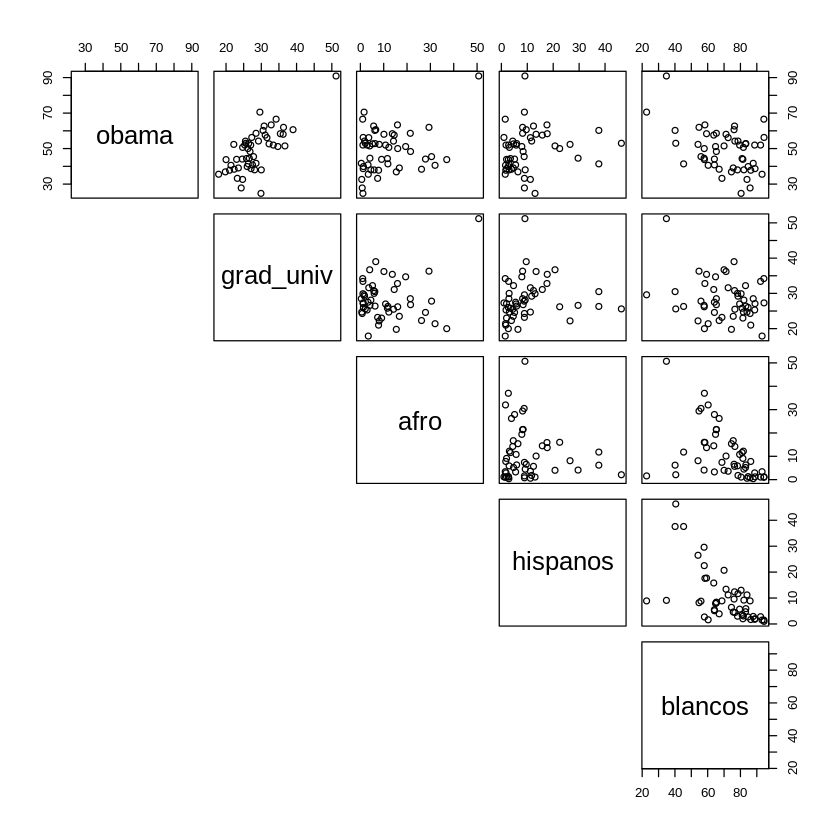

In [110]:
# Evidencia gráfica a través del gráfico de dispersión
pairs(data, lower.panel = NULL)

**<u>Interpretación resultados</u>.-** Podemos observar en los gráficos de dispersión que no existe un patrón puramente aleatorio, es decir, que no nos aparece todo el cuadrado lleno de puntos colocados de manera aleatoria. Luego, este hecho, es una evidencia de que podría existir una relación entre las variables. Como siempre, tenemos que confirmarlo con las evidencias numéricas y contrastadas.

In [111]:
names(data)

[1] "obama"     "grad_univ" "afro"      "hispanos"  "blancos"

In [112]:
cor_matrix = cor(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



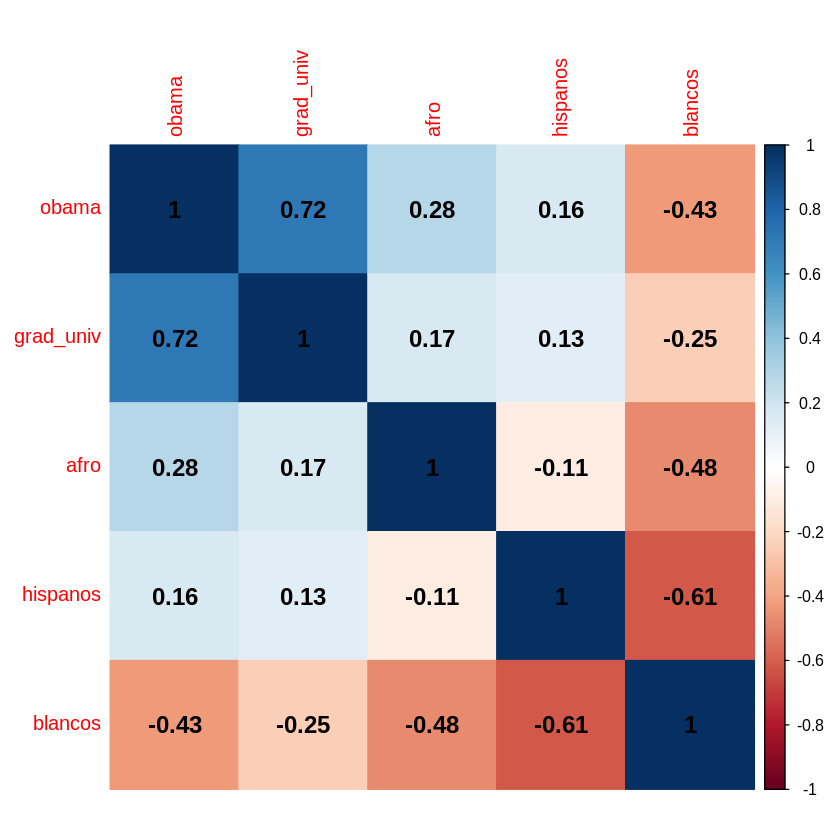

In [113]:
install.packages("corrplot")
library(corrplot)
corrplot(cor_matrix, method = "color",
         addCoef.col = "black",  # Color of the annotations
         number.cex = 1.2)

**<u>Interpretación resultados</u>.-** En este caso, para obtener las evidencias numéricas tendremos que calcular el coeficiente de correlación. En particular, realizaremos un análisis de la correlación lineal entre la variable dependiente y cada una de las variables explicativas obteniendo la matriz de correlaciones. Observamos que en todos los casos el coeficiente de correlación estimado entre las variables independientes y la variable dependiente es distinto de $0$, con lo cual sería una evidencia de que las variables sí están relacionadas. Sin embargo, hasta que no realicemos el contraste de correlación no sabremos si está bien calculado dicho coeficiente y podemos tomarlo como válido.

In [114]:
# Evidencia contrastada (variable blancos)
cor.test(data$obama, data$blancos)


	Pearson's product-moment correlation

data:  data$obama and data$blancos
t = -3.3266, df = 49, p-value = 0.001673
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6302539 -0.1742479
sample estimates:
       cor 
-0.4292205 


In [115]:
# Evidencia contrastada (variable hispanos)
cor.test(data$obama, data$hispanos)


	Pearson's product-moment correlation

data:  data$obama and data$hispanos
t = 1.1356, df = 49, p-value = 0.2617
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1207824  0.4172998
sample estimates:
      cor 
0.1601314 


In [116]:
# Evidencia contrastada (variable afro)
cor.test(data$obama, data$afro)


	Pearson's product-moment correlation

data:  data$obama and data$afro
t = 2.0689, df = 49, p-value = 0.04385
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.008516833 0.518517459
sample estimates:
      cor 
0.2834353 


In [117]:
# Evidencia contrastada (variable grad_univ)
cor.test(data$obama, data$grad_univ)


	Pearson's product-moment correlation

data:  data$obama and data$grad_univ
t = 7.1689, df = 49, p-value = 3.633e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.547943 0.827839
sample estimates:
      cor 
0.7154854 


**<u>Interpretación resultados</u>.-** El $p$-valor obtenido en el grado universitario, blancos y afros es muy pequeño siendo $< \alpha = 0.05$, luego tenemos que rechazar la hipótesis nula de que la correlación sea igual $0$, es decir, el nivel de votos que recibio Obama SI está correlacionado con que una persona tuviera grado universitario, fura blanco o fuera afro. De hecho, podemos destacar que la relación de la variable `obama` es directa con las variables `grad_univ` y `afro` e inversa con la variable `blancos`. Pero a pesar de lo que se podia preveer que la persona sea hispana tiene un p valor mayor que 0.05 y por lo tanto lo tenemos que eliminar de nuestro estudio

In [118]:
wdata <- subset(data, select = -hispanos)
head(wdata)

,obama,grad_univ,afro,blancos
,<dbl>,<dbl>,<dbl>,<dbl>
1,38.36,22.3,26.2,67.0
2,40.81,27.5,3.3,64.1
3,44.59,26.6,4.1,57.8
4,36.88,19.8,15.4,74.5
5,60.24,30.5,6.2,40.1
6,51.49,36.7,4.0,70.0


<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

In [119]:
# Estimación del modelo de regresión lineal múltiple incluyendo el dataset como parámetro
modelo <- lm(obama ~ grad_univ + blancos + afro, data = wdata)
modelo


Call:
lm(formula = obama ~ grad_univ + blancos + afro, data = wdata)

Coefficients:
(Intercept)    grad_univ      blancos         afro  
    23.6853       1.3185      -0.1777       0.0616  


**<u>Interpretación resultados</u>.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = 23.6853$, $\beta_1 = 1.3185$, $\beta_2 = -0.1777$ y $\beta_3 = 0.0616$. La interpretación de los parámetros $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$ en un modelo de regresión lineal múltiple donde la variable dependiente es los votos a obama y las variables independientes es fundamental para comprender la relación entre dichas variables. En este caso, $\beta_0=23.6853$ representa el valor de la intersección con el eje y, lo que implica el porcentaje de votos a obama cuando las tres variables independientes son cero. Es decir que se podria esperar el 23% de votos a obama cuando las demas variables fueran 0

Por otro lado, $\beta_1=1.3185$ es el coeficiente de la pendiente de la variable `grad_univ` y muestra cómo cambia el porcentaje de votos que obama recibe en funcion del porcentaje de graduados universitarios en cada estado. Específicamente, indica que por cada 1 por ciento adicional que se aumente los graduados, se espera un aumento de un $1.31\%$ en el porcentaje de votos que recibe obama. Con respecto a $\beta_2=-0.1777$ es el coeficiente de la pendiente de la variable `blancos`y muestra cómo cambia el porcentaje de votos a obama segun el numero de blancos en el estado. En este caso, nos indica que por cada unidad adicional (expresada en porcentaje de habitantes) que se aumente se espera una disminucion de un $0.18\%$ en el numero de votos. Por último, $\beta_3=0.0616$ que indica cierta proporcionalidad directa, pero esta es casi despreciable, ya que por cada porcentaje de afros que existan en ese estado, los votos a obama incrementaran unicamente un 0.06%

In [120]:
# Información de salida del modelo de regresión estimado
str(modelo)

List of 12
 $ coefficients : Named num [1:4] 23.6853 1.3185 -0.1777 0.0616
  ..- attr(*, "names")= chr [1:4] "(Intercept)" "grad_univ" "blancos" "afro"
 $ residuals    : Named num [1:51] -4.434 -7.944 -4.147 -0.619 3.086 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ effects      : Named num [1:51] -350.11 59.75 -21.87 -4.2 4.14 ...
  ..- attr(*, "names")= chr [1:51] "(Intercept)" "grad_univ" "blancos" "afro" ...
 $ rank         : int 4
 $ fitted.values: Named num [1:51] 42.8 48.8 48.7 37.5 57.2 ...
  ..- attr(*, "names")= chr [1:51] "1" "2" "3" "4" ...
 $ assign       : int [1:4] 0 1 2 3
 $ qr           :List of 5
  ..$ qr   : num [1:51, 1:4] -7.14 0.14 0.14 0.14 0.14 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:51] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:4] "(Intercept)" "grad_univ" "blancos" "afro"
  .. ..- attr(*, "assign")= int [1:4] 0 1 2 3
  ..$ qraux: num [1:4] 1.14 1 1.12 1.1
  ..$ pivot: int [1:4] 1 2 3 4
  ..$ tol  : num 1e-07
  ..$ rank : 

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

5.1 output de la regresion

In [121]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal
output <- summary(modelo)
output


Call:
lm(formula = obama ~ grad_univ + blancos + afro, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1363  -4.2902   0.3593   5.2047  14.4908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.68535    9.16325   2.585   0.0129 *  
grad_univ    1.31849    0.19860   6.639 2.89e-08 ***
blancos     -0.17773    0.07988  -2.225   0.0309 *  
afro         0.06160    0.11527   0.534   0.5956    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.866 on 47 degrees of freedom
Multiple R-squared:  0.583,	Adjusted R-squared:  0.5564 
F-statistic: 21.91 on 3 and 47 DF,  p-value: 5.085e-09


**<u>Interpretación resultados</u>.-**  Veamos cada uno de los elementos que presenta el objeto `output`. Los valores de los **coeficientes de regresión** ya los hemos comentado (columna `Estimate`). Los **errores típicos de los parámetros estimados** $\hat{\beta}_{0}, \hat{\beta}_{1}, \hat{\beta}_{2}, \hat{\beta}_{3}$ se encuentran en la columna `Std Error` de la salida anterior.

La columna `t value` contiene el estadístico `t`, es decir, cociente entre cada estimador y su error típico. Estos cocientes son la base para llevar a cabo los **contrastes de significatividad individual** cuya hipótesis nula y alternativa son $H_0:\hat{\beta}_{0}=0, H_0:\hat{\beta}_{1}=0, H_0:\hat{\beta}_{2}=0, H_0:\hat{\beta}_{3}=0$. Los correspondientes p-valores aparecen en la columna `Pr(>|t|)`. En este ejemplo, en todas las variables excepto `afro` son menores que el nivel de signifcación por defecto $5\%$. Luego, se rechaza la hipótesis nula en esos casos y por tanto, son estadísticamente significativos los coeficiente estimados para $\hat{\beta}_{1}$ y $\hat{\beta}_{2}$. Como no podemos rechazar la $H_0$ para el caso de la variable `afro` quiere decir que entonces, $\beta_{3}=0$. Lo que implica que dicha variable no nos va a explicar nada de nuestra variable dependiente (`obama`) ya que $0 * exper_i$ es $0$. Es decir, podríamos sacarla del modelo.

El estimador de la **desviación típica de los errores** $\sigma$ aparece como `Residual standard error` y su valor en este caso es igual a $7.866$ siendo $47$ el número de grados de libertad `degrees of freedom` que se calcula como el número total de obervaciones - número de parámetros estimados = $51 - 4 = 47$. En resumen, el modelo de regresión lineal **múltiple** para la ecuación de salarios una vez estimados los coeficientes de regresión quedaría del siguiente modo:

\begin{align*}
wage_{i}&=23.6853+1.3184 * graduniv_{i}-0.1777 * blancos_{i}+\hat \epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

5.2 coeficientes de regresion estimados

Vamos a <u>extraer los coeficientes de regresión</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

* Extracción **directa** de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ utilizando el objeto `output`.


* Extracción de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ con la **función** $\tt coef$ sobre el `modelo` estimado.


* **Cálculo manual** de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ a partir de la siguiente **ecuación formal.** En el caso múltiple tenemos que proceder del siguiente modo. El estimador de MCO para los coeficientes $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ viene dado por la expresión:

\begin{align*}
\hat \beta = {\left( {X'X} \right)^{ - 1}}X'y
\end{align*}

Para ello hemos necesitado construir la matriz de variables independientes $X=x_1, x_2, x_3$ y el vector de la variable dependiente $y$.

In [122]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),23.68534566,9.16325049,2.5848192,1.290760e-02
grad_univ,1.31849126,0.19860113,6.6388911,2.888112e-08
blancos,-0.17773263,0.07988228,-2.2249319,3.092337e-02
afro,0.06160173,0.11526826,0.5344206,5.955697e-01


In [123]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat <- coef(modelo)
bhat

(Intercept)   grad_univ     blancos        afro 
23.68534566  1.31849126 -0.17773263  0.06160173

In [124]:
# Cálculo manual de betas
y <- wdata[, 1]
X <- as.matrix(cbind(cte = 1, wdata[, 2:4]))  # Llamo a la columna de 1s, cte.
head(cbind(y, X))

,y,cte,grad_univ,afro,blancos
1,38.36,1,22.3,26.2,67.0
2,40.81,1,27.5,3.3,64.1
3,44.59,1,26.6,4.1,57.8
4,36.88,1,19.8,15.4,74.5
5,60.24,1,30.5,6.2,40.1
6,51.49,1,36.7,4.0,70.0


In [125]:
# Calculamos los coeficientes estimados utilizando las matrices obtenidas en el paso anterior
betas <- solve(t(X) %*% X) %*% t(X) %*% y
betas

cte,23.68534566
grad_univ,1.31849126
afro,0.06160173
blancos,-0.17773263


**<u>Interpretación resultados</u>.-** El coeficiente $\beta_0=23.6853$ representa el valor de intersección, que sería el porcentaje de  votos a obama cuando todas las variables independientes son cero. Es una base teórica ya que, en la práctica, estas variables nunca serian 0. El coeficiente $\beta_1=1.3185$ es el coeficiente de la pendiente de la variable `grad_univ` y muestra cómo cambia el porcentaje de votos que obama recibe en funcion del porcentaje de graduados universitarios en cada estado. Específicamente, indica que por cada 1 por ciento adicional que se aumente los graduados, se espera un aumento de un $1.31\%$ en el porcentaje de votos que recibe obama. Con respecto a $\beta_2=-0.1777$ es el coeficiente de la pendiente de la variable `blancos`y muestra cómo cambia el porcentaje de votos a obama segun el numero de blancos en el estado. En este caso, nos indica que por cada unidad adicional (expresada en porcentaje de habitantes) que se aumente se espera una disminucion de un $0.18\%$ en el numero de votos. Por último, $\beta_3=0.0616$ que indica cierta proporcionalidad directa, pero esta es casi despreciable, ya que por cada porcentaje de afros que existan en ese estado, los votos a obama incrementaran unicamente un 0.06%

A gran escala estos valores indican que la variable obama es directamente proporcional a grad_univ y inversamente proporcional a blancos

5.3 valores ajustados de la variable independiente

Vamos a <u>extraer los valores ajustados</u> de la variable dependiente a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** de los valores ajustados de nuestra variable dependiente $\hat{y}$ sobre el `modelo`estimado.


+ Extracción de los valores ajustados de nuestra variable dependiente $\hat{y}$ con la **función** $\tt fitted$ sobre el `modelo`estimado.


+ **Cálculo manual** de los valores ajustados de nuestra variable dependiente $\hat{y}$ a partir de la siguiente **ecuación formal:**

\begin{align*}
\hat y_i&=\hat \beta_{0}+\hat \beta_{1}x_{i,1} + \hat \beta_{2}x_{i,2} + \hat \beta_{3}x_{i,3}  
\end{align*}

In [126]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1        2        3        4        5        6 
42.79358 48.75448 48.73683 37.49906 57.15418 59.87910

In [127]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat <- fitted(modelo)
head(yhat)

1        2        3        4        5        6 
42.79358 48.75448 48.73683 37.49906 57.15418 59.87910

In [128]:
# Cálculo manual de los valores ajustados (alternativa a)
yajustado <- bhat[1]+bhat[2]*data$grad_univ+bhat[3]*data$blancos+bhat[4]*data$afro
head(yajustado)

[1] 42.79358 48.75448 48.73683 37.49906 57.15418 59.87910

In [129]:
# Cálculo manual de los valores ajustados (alternativa b)
yajustado1 <- bhat["(Intercept)"]+bhat["grad_univ"]*data$grad_univ+bhat["blancos"]*data$blancos+bhat["afro"]*data$afro
head(yajustado1)

[1] 42.79358 48.75448 48.73683 37.49906 57.15418 59.87910

**<u>Interpretación resultados</u>.-** Estos valores ajustados, (no confundir con valores predichos), son el resultado de aplicar la ecuación de regresión a los valores observados de las variables independientes. En términos prácticos, **representan lo que el modelo anticipa que debería ser la cantidad de votos de obama** para el porcentaje de grados universitario, blancos y afros en cada estado analizado. La comparación de estos valores ajustados con los valores reales de la variable obama permite evaluar la precisión y utilidad del modelo. Que es lo que se realiza a continuacion con los residuos

5.4 los residuos estimados

Vamos a <u>extraer los residuos</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** del valor de los residuos estimados $\hat{\epsilon}$ sobre el `modelo`estimado.


+ Extracción del valor de los residuos estimados $\hat{\epsilon}$ con la **función** $\tt resid$ sobre el `modelo`estimado.


+ **Cálculo manual** del valor de los residuos estimados $\hat{\epsilon}$ a partir de la siguiente **ecuación formal**. Es decir, los resiudos se calculan como la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo $i=1,..., n$ como aparece en la siguiente imagen.

\begin{align*}
\hat \epsilon_i = y_i - \hat y_i
\end{align*}

In [130]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)

1          2          3          4          5          6 
-4.4335799 -7.9444794 -4.1468342 -0.6190584  3.0858187 -8.3890977

In [131]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat <- resid(modelo)
head(uhat)

1          2          3          4          5          6 
-4.4335799 -7.9444794 -4.1468342 -0.6190584  3.0858187 -8.3890977

In [132]:
# Cálculo manual del valor de los residuos
residuos <- data$obama-yajustado
head(residuos)

[1] -4.4335799 -7.9444794 -4.1468342 -0.6190584  3.0858187 -8.3890977

In [133]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(data$obama,yhat,yajustado,yajustado1,uhat,residuos))

,,yhat,yajustado,yajustado1,uhat,residuos
1,38.36,42.79358,42.79358,42.79358,-4.4335799,-4.4335799
2,40.81,48.75448,48.75448,48.75448,-7.9444794,-7.9444794
3,44.59,48.73683,48.73683,48.73683,-4.1468342,-4.1468342
4,36.88,37.49906,37.49906,37.49906,-0.6190584,-0.6190584
5,60.24,57.15418,57.15418,57.15418,3.0858187,3.0858187
6,51.49,59.87910,59.87910,59.87910,-8.3890977,-8.3890977


**<u>Interpretación resultados</u>.-** En este caso, los residuos representan la diferencia entre los valores observados en la variable obama y los valores predichos por el modelo. Estos residuos **son indicativos de la parte de votos a obama que no se puede explicar solo por las variables independientes consideradas**.

En este caso los residuos son de aproximadamente el 10% del valor que se requiere, pero si que se podria considerar que se encuentran al rededor del 0 y por ello aunque el modelo no captura completamente la relacion entre la variable dependiente y las independientes, no hace un mal trabajo.

5.5 grados de libertad

Vamos a <u>extraer los grados de libertad</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** del valor de los grados de libertad utilizando el objeto `output`.


+ Extracción del valor de los grados de libertad con la **función** $\tt df.residual$ sobre el `modelo`estimado.


+ **Cálculo manual** del valor de los grados de libertad a partir de la siguiente **ecuación formal:**

$g.d.l.=n-k$ siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados.

In [134]:
# Extracción directa del valor de los grados de libertad (utilizamos output NO modelo)
head(output$df)[2]

[1] 47

In [135]:
# Extracción del valor de los grados de libertad con la función `df.residual`
df = df.residual(modelo)
df

[1] 47

In [136]:
# Cálculo manual** del valor de los grados de libertad (utilizamos output NO modelo)
gdl = nrow(data)- output$df[1]
gdl

[1] 47

**<u>Interpretación resultados</u>.-** En un modelo de regresión lineal múltiple (igual que en el caso simple), los grados de libertad se calculan tomando el número total de observaciones y restando el número de parámetros estimados (en este caso, cuatro parámetros). Por lo tanto, si hay 47 grados de libertad, esto implica que el conjunto de datos original tenía 51 observaciones. No existe un criterio formal que indique qué es un número elevado o no de grados de libertad aunque si es menor que $100$ como en este caso sí que se suele identificar con una menor confiabilidad en los resultados.

5.6 suma de los cuadrados de los residuos

Vamos a <u>extraer la suma de cuadrados de los residuos</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el objeto `output`. Este estadístico cuantifica **cuánta información de la variable dependiente se pierde con el modelo empleado** (variables independientes utilizadas). Es útil cuándo lo comparamos con otros modelos.


+ Extracción del valor de la suma de cuadrados de los residuos con la **función** $\tt deviance$ sobre el `modelo`estimado.


+ **Cálculo manual** del valor de la suma de cuadrados de los residuos a partir de la siguiente **ecuación formal:**

\begin{align*}
SSR = \hat \sigma = \sqrt {\frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{n - k}}}
\end{align*}

In [137]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 7.866306

In [138]:
# Extracción del valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(modelo)/gdl)
ssr

[1] 7.866306

In [139]:
# Cálculo manual del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/gdl)
sigma

[1] 7.866306

**<u>Interpretación resultados</u>.-** La suma de cuadrados de los residuos (SSR) es una medida estadística que refleja la variabilidad en una variable dependiente, en este caso, el porcentaje de votos que recibe obama, que no es explicada por el modelo de regresión lineal múltiple. En el contexto de este modelo, donde hemos considerado tres variables independientes, un SSR de $7.866$ indica la **cantidad total de variabilidad en los votos a obama que no es capturada por el modelo**. Esta cifra representa la suma de los cuadrados de las diferencias entre los valores observados de la variable obama y los valores predichos por el modelo. Hay otros factores significativos que afectan a los votos a obama y que no están incluidos en el modelo actual, ya que el SSR es grande

5.7 errores de los parametros estimados

Vamos a <u>extraer los errores de los parámetros</u> estimados a través de **dos formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ utilizando el objeto `output`.


+ **Cálculo manual** de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1})'$ a partir de la siguiente **ecuación formal**. Los errores estándar de los parámetros estimados (`Std. Error`) se obtienen a partir de la raíz cuadrada de la diagonal de la matriz de varianzas-covarianzas estimada. El estimador de la matriz de varianzas-covarianzas se calcula a través de la siguiente expresión y se obtiene a través de la función `vcov` directamente.

\begin{align*}
Var\left( {\hat \beta } \right) = {\hat \sigma^2}{\left( {X'X} \right)^{ - 1}}
\end{align*}

In [140]:
# Extracción directa de los errores de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),23.68534566,9.16325049,2.5848192,1.290760e-02
grad_univ,1.31849126,0.19860113,6.6388911,2.888112e-08
blancos,-0.17773263,0.07988228,-2.2249319,3.092337e-02
afro,0.06160173,0.11526826,0.5344206,5.955697e-01


In [141]:
# Cálculo manual de los errores de los coeficientes de regresión
# Obtener la matriz de var-cov directamente
varcov=vcov(modelo)
varcov

,(Intercept),grad_univ,blancos,afro
(Intercept),83.9651595,-1.310721510,-0.583040104,-0.407523818
grad_univ,-1.3107215,0.039442407,0.003008033,-0.001382051
blancos,-0.5830401,0.003008033,0.006381178,0.004226098
afro,-0.4075238,-0.001382051,0.004226098,0.013286772


In [142]:
# Obtenemos los errores estándar de los parámetros estimados
se = sqrt(diag(varcov))
print(se)

(Intercept)   grad_univ     blancos        afro 
 9.16325049  0.19860113  0.07988228  0.11526826 


In [143]:
# Obtenemos la matriz de var-cov paso a paso (paso 1)
y = wdata[,1]
X = as.matrix(cbind(cte=1,wdata[,2:4]))
head(cbind(y,X))

,y,cte,grad_univ,afro,blancos
1,38.36,1,22.3,26.2,67.0
2,40.81,1,27.5,3.3,64.1
3,44.59,1,26.6,4.1,57.8
4,36.88,1,19.8,15.4,74.5
5,60.24,1,30.5,6.2,40.1
6,51.49,1,36.7,4.0,70.0


In [144]:
# Obtenemos la matriz de var-cov paso a paso (paso 2)
varcov2 = sigma^2 * solve(t(X) %*% X)
varcov2

,cte,grad_univ,afro,blancos
cte,83.9651595,-1.310721510,-0.407523818,-0.583040104
grad_univ,-1.3107215,0.039442407,-0.001382051,0.003008033
afro,-0.4075238,-0.001382051,0.013286772,0.004226098
blancos,-0.5830401,0.003008033,0.004226098,0.006381178


In [145]:
# Obtenemos los errores estándar de los parámetros estimados
se2 = sqrt(diag(varcov2))
print(se2)

       cte  grad_univ       afro    blancos 
9.16325049 0.19860113 0.11526826 0.07988228 


**<u>Interpretación resultados</u>.-** La interpretación de los errores estándar de los coeficientes en un modelo de regresión lineal múltiple es crucial para **entender la precisión de las estimaciones de los coeficientes**. En este caso, donde la variable dependiente es el porcentaje de votos a obama y las variables independientes son el porcentaje de graduados universitarios, de blancos y de afros por estado, los errores estándar asociados a $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$ indican la variabilidad o incertidumbre en la estimación de estos coeficientes. Un error estándar de $9.163$ para $\beta_0$ sugiere una variabilidad alta en la estimación de los votos base (sin considerar los otros factores), mientras que un error estándar de $0.1986$ para $\beta_1$, de $0.1152$ para $\beta_2$ y $0.0798$ para $\beta_3$ reflejan la precisión en la estimación del efecto de las 3 variables independientes en los votos a obama

5.9 coeficientes de determinacion

Vamos a <u>extraer los coeficientes de determinación</u> estimados a través de **tres formas** diferentes siendo todas ellas equivalentes:

+ Extracción **directa** del valor de los coeficientes de determinación utilizando el objeto `output`.


+ **Cálculo manual** del coeficiente de determinación a partir de la siguiente **ecuación formal:** (Opción 1)

\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores originales de la variable dependiente $y_i$ y el valor promedio de dicha variable $\bar y_i$ tal y como aparece en la siguiente imagen.

In [146]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2=output$r.squared
R2

[1] 0.5830337

In [147]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = data$obama-mean(data$obama)
residuos2

[1] -10.6656863  -8.2156863  -4.4356863 -12.1456863  11.2143137   2.4643137
 [7]   9.0343137   9.5843137  41.8843137   0.9843137  -3.5456863  21.5243137
[13] -16.4056863   8.5743137  -5.0956863   2.9643137 -11.0356863 -11.2256863
[19]  -8.4456863   7.2443137  12.9443137  11.6243137   5.1843137   3.6243137
[25]  -5.2356863  -4.6456863  -7.3256863 -10.9956863   3.3343137   2.9543137
[31]   9.3543137   3.9643137  14.3243137  -0.6756863 -10.3356863   1.6443137
[37] -15.7956863   5.2143137   2.9443137  13.6743137  -4.9356863  -9.1556863
[43]  -9.9456863  -7.6456863 -24.2756863  17.5443137   2.1343137   7.1343137
[49] -13.4856863   3.8043137 -21.2056863

In [148]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1=1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.5830337

In [149]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(data$obama)
R2.2

[1] 0.5830337

In [150]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.5830337,0.5830337,0.5830337


**<u>Interpretación resultados</u>.-** El coeficiente de determinación $R^2$, es una medida fundamental en la interpretación de un modelo de regresión lineal múltiple. En este caso, donde la variable dependiente es el nivel de salarios y las variables independientes son el nivel de educación, los años de experiencia de vida laboral y los años en el actual puesto de trabajo, un $R^2$ igual a $0.5830$ significa que aproximadamente el $58.30\%$ de la **variabilidad en los votos a obama puede ser explicada por dichas variables**. Este valor implica que, aunque existe una relación entre las mismas, hay otros factores significativos que también influyen en el porcentaje de votos a obama y que no están incluidos en el modelo. El $R^2$ de este tamaño sugiere que, aunque dichas variables son factores importantes dejan un porcentaje de la variabilidad (aprox 40%) atribuible a otros factores no contemplados en el modelo.

In [151]:
# Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj=output$adj.r.squared
R2adj

[1] 0.5564189

In [152]:
# Obtenemos R2 ajustado a través de su ecuación formal 1-(1-R2)*(n-1/n-k)
# k = número parámetros estimados
# n = número de observaciones
R2adj_2=1-(1-R2)*((51-1)/(51-4))
R2adj_2

[1] 0.5564189

5.9 intervalos de confianza para los coeficientes de regresion

In [153]:
# Extracción de los intervalos de confianza para los coeficientes de regresión con la función `confint`
# Ejemplo para un nivel de confianza del 95%
ci.bhat <- confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),5.2512634,42.11942790
grad_univ,0.9189573,1.71802519
blancos,-0.3384350,-0.01703022
afro,-0.1702881,0.29349156


In [154]:
# Ejemplo para un nivel de confianza del 90%
ci.bhat2 <- confint(modelo, level = 0.9)
ci.bhat2

,5 %,95 %
(Intercept),8.3100828,39.06060851
grad_univ,0.9852531,1.65172939
blancos,-0.3117692,-0.04369602
afro,-0.1318100,0.25501343


**<u>Interpretación resultados</u>.-** Los intervalos de confianza nos proporcionan información sobre el par de números entre los cuales se estima que estará el valor de cada uno de los coeficientes estimados con un determinado nivel de confianza. Como se puede observar para el grad_univ, blancos y afro el rango esta entre 0.3 y 0.6 para un 90% de confianza, lo que indica un alto nivel de precision en estos valores. Sin embargo en el intercept obtenemos un rango de unos 30 para 90% de confianza, lo cual esta lejos de ser optimo y preciso

5.10 estadistico F y su p valor

In [155]:
# Extracción directa del valor del estadístico F
fstat.all <- output$fstatistic[1]
print(fstat.all)

   value 
21.90632 


In [156]:
# Comprobamos que el valor del estadístico F y su p-valor coinciden con los que aparecen en el summary del modelo
summary(modelo)


Call:
lm(formula = obama ~ grad_univ + blancos + afro, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.1363  -4.2902   0.3593   5.2047  14.4908 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.68535    9.16325   2.585   0.0129 *  
grad_univ    1.31849    0.19860   6.639 2.89e-08 ***
blancos     -0.17773    0.07988  -2.225   0.0309 *  
afro         0.06160    0.11527   0.534   0.5956    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.866 on 47 degrees of freedom
Multiple R-squared:  0.583,	Adjusted R-squared:  0.5564 
F-statistic: 21.91 on 3 and 47 DF,  p-value: 5.085e-09


**<u>Interpretación resultados</u>.-** En este caso, realizamos el contraste de **significatividad global** del conjunto de parámetros $\beta^{'s}$ siendo la hipótesis nula $H_0:\beta_0=\beta_1=\beta_2=\beta_3$. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación fijado por defecto ($5\%$). Lo que implica que los valores de los coeficientes son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

### 03 Ejercicio [2 puntos]

Utilizando el dataset del ejercicio anterior encontrar de forma automática el mejor modelo de regresión lineal múltiple para explicar la variable `obama` en función del resto de variables excepto `estado`. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos:

1. Criterios de selección del modelo en base al ajuste de los datos
2. Proceso de automatización del proceso de selección del mejor modelo
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

In [157]:
# Estoy realizando la tarea en google colab por eso el path es: "/content/USA.txt"

df = read.csv("/content/USA.txt", header = TRUE, sep = " ", dec = ".")
zdata <- df[, !names(df) %in% "estado"]
head(zdata)

,region,densidad,veteranos,mujeres,grad_instituto,grad_univ,afro,asia,hispanos,blancos,evangelicos,protestantes,relig_afro,catolicos,mormones,jubilados,paro,salario,obama,diputados
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,3,94.4,8.1,51.5,82.6,22.3,26.2,1.1,3.9,67.0,49,1,18,6,1,13.8,8.0,43464,38.36,9
2,4,1.2,10.1,48.0,91.6,27.5,3.3,5.4,5.5,64.1,26,19,2,14,4,7.7,7.6,63648,40.81,3
3,4,56.3,8.2,50.3,85.4,26.6,4.1,2.8,29.6,57.8,23,15,2,25,4,13.8,8.4,47044,44.59,11
4,3,56.0,7.9,50.9,83.3,19.8,15.4,1.2,6.4,74.5,53,16,10,5,0,14.4,7.6,39018,36.88,6
5,4,239.1,5.0,50.3,81.0,30.5,6.2,13.0,37.6,40.1,18,14,4,31,2,11.4,10.4,57020,60.24,55
6,4,48.5,8.1,49.9,89.9,36.7,4.0,2.8,20.7,70.0,23,19,2,19,2,10.9,7.8,57255,51.49,9


<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [158]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata=na.omit(zdata)
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 51

[1] 51

<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

In [159]:
# 1º Tenemos que estimar el modelo con todas las variables
mod_full=lm(obama ~ ., data = wdata)
summary(mod_full)


Call:
lm(formula = obama ~ ., data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0109 -2.2652  0.4366  1.7794 12.4711 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.464e+02  1.747e+02  -0.838 0.408275    
region         -2.145e+00  1.714e+00  -1.251 0.220294    
densidad        2.133e-03  1.155e-03   1.846 0.074472 .  
veteranos       3.909e-01  1.259e+00   0.311 0.758220    
mujeres         1.487e+00  3.250e+00   0.457 0.650507    
grad_instituto  6.418e-01  5.968e-01   1.076 0.290449    
grad_univ       8.180e-01  3.982e-01   2.054 0.048457 *  
afro           -3.334e-02  4.630e-01  -0.072 0.943056    
asia            1.362e+00  4.382e-01   3.107 0.004025 ** 
hispanos        5.531e-01  3.185e-01   1.737 0.092399 .  
blancos         3.252e-01  2.590e-01   1.256 0.218547    
evangelicos    -1.851e-01  1.186e-01  -1.561 0.128653    
protestantes    1.957e-01  1.868e-01   1.048 0.302967    
relig_afro      7.583e-01  6.971e-

In [160]:
# 2º Búsqueda automática del modelo óptimo hacia atrás
step(mod_full,direction="backward")

Start:  AIC=176.06
obama ~ region + densidad + veteranos + mujeres + grad_instituto + 
    grad_univ + afro + asia + hispanos + blancos + evangelicos + 
    protestantes + relig_afro + catolicos + mormones + jubilados + 
    paro + salario + diputados

                 Df Sum of Sq     RSS    AIC
- afro            1      0.12  734.94 174.07
- jubilados       1      1.43  736.24 174.16
- veteranos       1      2.29  737.10 174.22
- catolicos       1      2.81  737.63 174.25
- mujeres         1      4.96  739.78 174.40
- salario         1     24.98  759.80 175.76
- protestantes    1     26.01  760.83 175.83
- grad_instituto  1     27.42  762.24 175.93
- relig_afro      1     28.05  762.87 175.97
- diputados       1     29.04  763.86 176.03
<none>                         734.82 176.06
- region          1     37.10  771.91 176.57
- blancos         1     37.39  772.20 176.59
- evangelicos     1     57.77  792.58 177.92
- hispanos        1     71.48  806.30 178.79
- densidad        1     80.


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = wdata)

Coefficients:
   (Intercept)        densidad         mujeres  grad_instituto       grad_univ  
    -3.263e+02       1.555e-03       5.087e+00       1.056e+00       4.207e-01  
          asia        hispanos     evangelicos        mormones            paro  
     7.629e-01       1.379e-01      -1.596e-01      -3.967e-01       1.854e+00  


**<u>Interpretación resultados</u>.-** Al inicio del algoritmo, tenemos en Start el modelo inicial, entrado a la función $\tt step$, y su valor de AIC. A continuación, en cada paso se disponen en una tabla las variables y el valor de AIC que obtendría el modelo si se eliminara la variable en cuestión. Las variables aparecen en la tabla ordenadas en orden ascendente del AIC que se obtiene al eliminarlas.

El algoritmo va eliminando la primera variable de la tabla y finaliza cuando si se elimina la primera variable de la tabla, aumenta el AIC empeorando el modelo. En este caso, se eliminan $10$ variables resultando un modelo de regresión con nueve variables independientes y con un valor de $AIC=165.22$. La última parte de la salida de la función nos da las variables y los coeficientes de regresión del modelo que mejor se ajusta de todos los posibles.

Ahora, ejecutemos a continuación la función $\tt step$ pero ahora con `direction="forward"` desde un modelo sin variables independientes (que se indica con ~1) y un rango que permita llegar al modelo completo con todas las variables.

In [161]:
# 1º Tenemos que estimar el modelo más sencillo (modelo cte)
mod_cte= lm(obama~1,data=wdata)
summary(mod_cte)


Call:
lm(formula = obama ~ 1, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.276  -8.801   1.644   7.189  41.884 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   49.026      1.654   29.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.81 on 50 degrees of freedom


In [162]:
# 2º Búsqueda automática del modelo óptimo hacia delante
step(mod_cte,direction="forward",scope=list(lower=mod_cte, upper=mod_full)) # con forward hay que poner el scope

Start:  AIC=252.83
obama ~ 1

                 Df Sum of Sq    RSS    AIC
+ grad_univ       1    3570.6 3404.3 218.25
+ densidad        1    2378.5 4596.4 233.56
+ mujeres         1    1702.0 5272.9 240.56
+ catolicos       1    1549.6 5425.3 242.02
+ salario         1    1351.1 5623.8 243.85
+ blancos         1    1285.0 5689.9 244.45
+ asia            1    1174.4 5800.5 245.43
+ evangelicos     1    1129.4 5845.5 245.82
+ mormones        1     843.4 6131.5 248.26
+ paro            1     795.7 6179.2 248.65
+ veteranos       1     739.8 6235.1 249.11
+ region          1     578.7 6396.2 250.41
+ afro            1     560.3 6414.6 250.56
<none>                        6974.9 252.83
+ hispanos        1     178.9 6796.1 253.51
+ diputados       1     153.4 6821.5 253.70
+ jubilados       1     100.2 6874.7 254.09
+ relig_afro      1      98.4 6876.5 254.11
+ grad_instituto  1      66.3 6908.6 254.34
+ protestantes    1       2.6 6972.3 254.81

Step:  AIC=218.25
obama ~ grad_univ

        


Call:
lm(formula = obama ~ grad_univ + paro + jubilados + asia + mormones + 
    densidad + evangelicos + mujeres + protestantes, data = wdata)

Coefficients:
 (Intercept)     grad_univ          paro     jubilados          asia  
  -1.365e+02     8.494e-01     2.043e+00     7.263e-01     7.332e-01  
    mormones      densidad   evangelicos       mujeres  protestantes  
  -2.833e-01     1.134e-03    -1.956e-01     2.678e+00     1.972e-01  


**<u>Interpretación resultados</u>.-** En este caso, se eliminan también $10$ variables independientes resultando un modelo de regresión con nueve variables independientes y con un valor de $AIC=166.02$ pero diferente al caso anterior. En el forward incluye las variables jubilado y protestantes, mientras que backwards incluye grad_instituto e hispanos; resultando el AIC del backwards menor que el forward. Luego, el modelo que mejor se ajusta al conjunto de datos proporcionado a la hora de explicar el nivel de precios de las viviendas es el obtenido a traves de backward:

\begin{align*}
obama_{i}&=\hat \beta_{0}+\hat\beta_{1}*densidad_{i}+\hat\beta_{2}*mujeres_{i}+\hat\beta_{3}*gradinstituto_{i}+\hat\beta_{4}*graduniv_{i}+\hat\beta_{5}*asia_{i}+\hat\beta_{6}*hispanos_{i}+\hat\beta_{7}*evangelicos_{i}+\hat\beta_{8}*mormones_{i}+\hat\beta_{9}*paro_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

donde $\hat \beta_0=-326.3$, $\hat \beta_1=-0.00155$, $\hat \beta_2=5.087$, $\hat \beta_3=1.056$, $\hat \beta_4=0.4207$, $\hat \beta_5=0.7629$, $\hat \beta_6=0.1379$, $\hat \beta_7=-0.1596$, $\hat \beta_8=-0.3967$  y $\hat \beta_9=1.854$.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [163]:
# Definimos el modelo que mejor se ajusta a los datos
mod_best=lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + asia + hispanos + evangelicos + mormones + paro, data = wdata)
summary(mod_best)


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1779  -2.0756   0.1336   1.2912  15.6640 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3.263e+02  9.779e+01  -3.336 0.001813 ** 
densidad        1.555e-03  7.079e-04   2.197 0.033738 *  
mujeres         5.087e+00  1.395e+00   3.646 0.000743 ***
grad_instituto  1.056e+00  4.479e-01   2.359 0.023195 *  
grad_univ       4.207e-01  2.328e-01   1.807 0.078131 .  
asia            7.629e-01  1.269e-01   6.012 4.16e-07 ***
hispanos        1.379e-01  1.048e-01   1.316 0.195527    
evangelicos    -1.596e-01  8.063e-02  -1.979 0.054539 .  
mormones       -3.967e-01  8.282e-02  -4.789 2.20e-05 ***
paro            1.854e+00  4.915e-01   3.772 0.000512 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.63

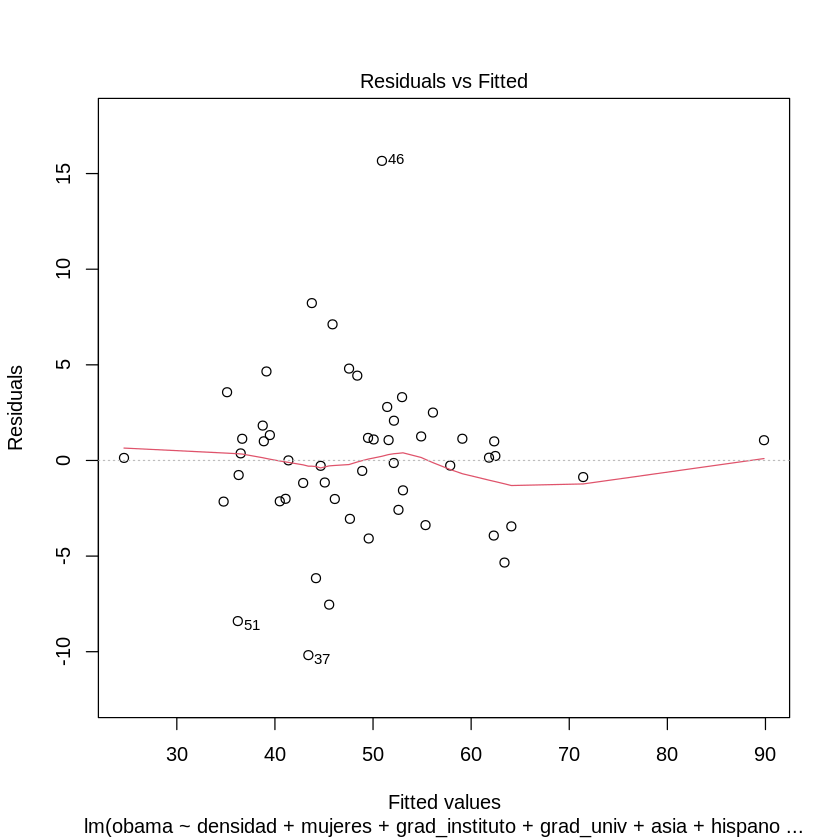

In [164]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_best, which=1)

**<u>Interpretación resultados</u>.-** La primera gráfica nos ayuda a decidir si las variables están linealmente relacionadas. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). En este caso, podemos ver como existe un cierto patrón, luego sería una `evidencia NEGATIVA`.

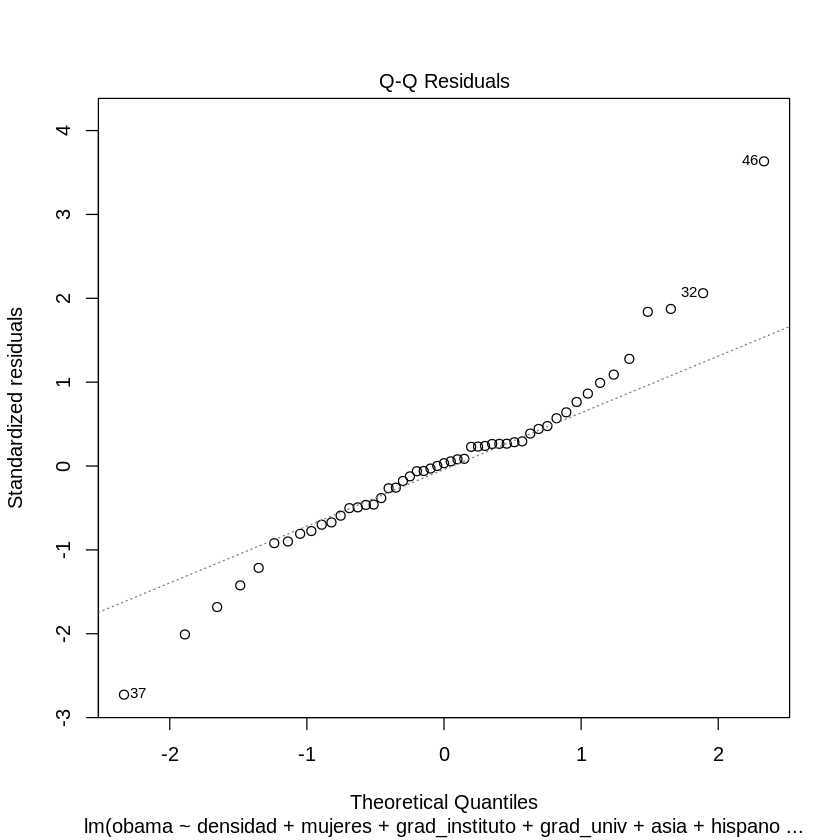

In [165]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_best, which=2)

**<u>Interpretación resultados</u>.-** La segunda es la gráfica de quantil-quantil sobre la normalidad de los residuos. Para que sea una evidencia positiva en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos. En este caso entre -1 y 1 sigue bastante correctamente la linea pero antes de -1 y despues de 1 se desvia, lo que indica que sería una `evidencia NEGATIVA` ya que los residuos no siguen una distribución normal.

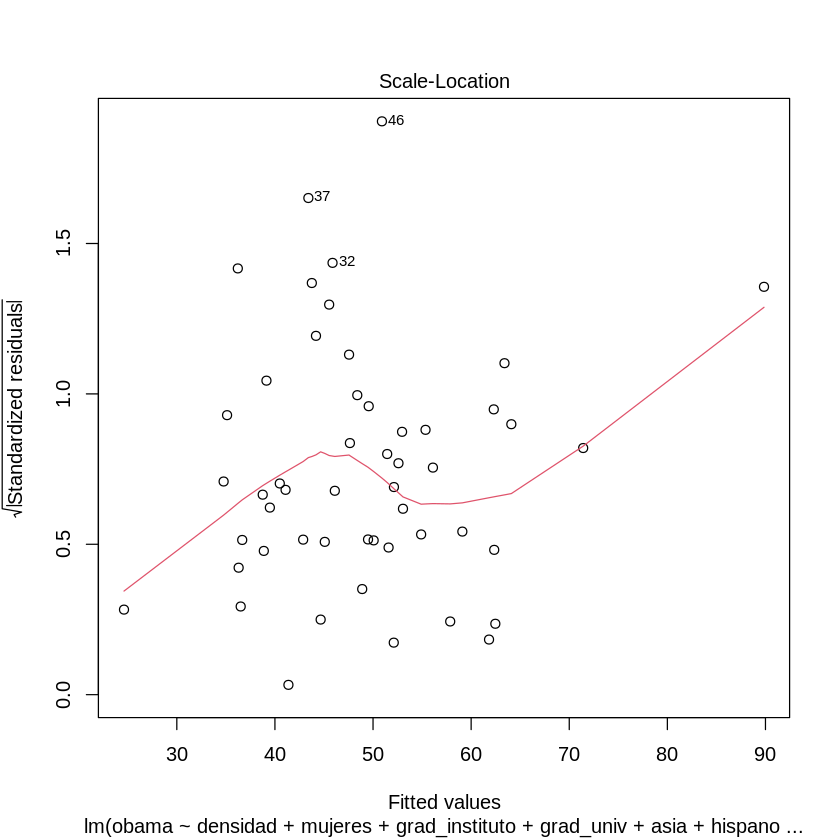

In [166]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_best, which=3)

**<u>Interpretación resultados</u>.-** La tercera gráfica es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la homocedasticidad de la varianza de los residuos. Para que sea una evidencia positiva en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En este caso difiere mucho de una linea horizontal, por lo tanto sería una `evidencia NEGATIVA`. Es decir, la varianza de los residuos no serían homocedásticos sino heterocedásticos.

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


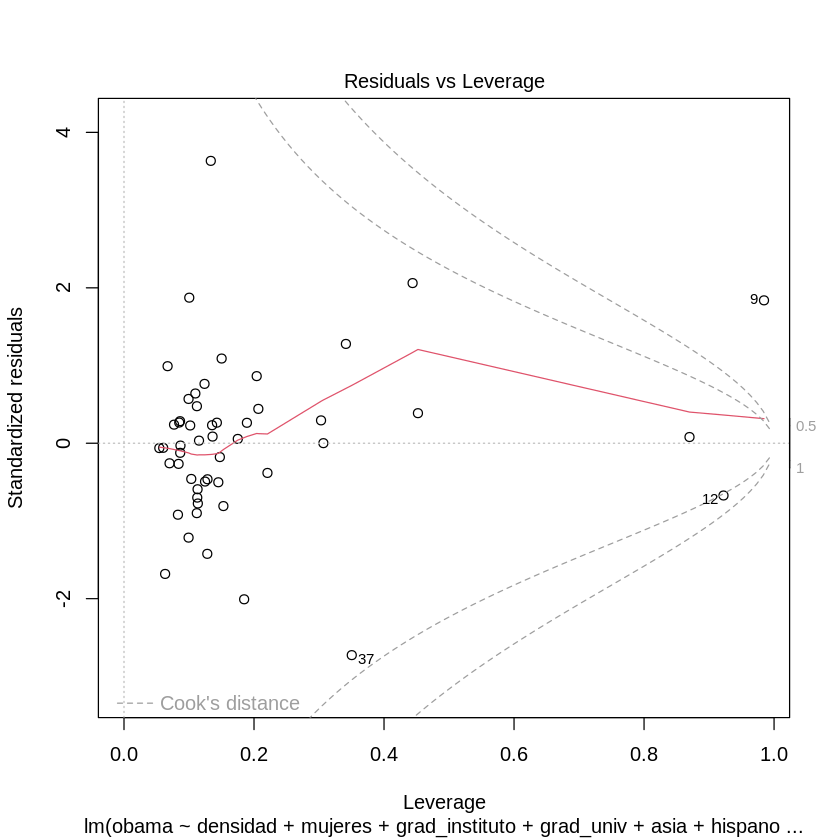

In [167]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_best, which=5)

**<u>Interpretación resultados</u>.-** La cuarta gráfica trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo:

* Las observaciones influyentes son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una evidencia positiva en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook. Como se puede apreciar hay un punto fuera de estas lineas, por lo tanto es una `evidencia NEGATIVA`


* Un punto aberrante es una observación que tiene un valor muy alto del residuo asociado. Para que sea una `evidencia POSITIVA` en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha, como en este caso


* Una observación con alto efecto palanca "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una `evidencia NEGATIVA`, como ocurre en este caso, en esta gráfica deben de exitir puntos con valores muy positivos y muy a la derecha.

In [168]:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ +
    asia + hispanos + evangelicos + mormones + paro, data = wdata)


Call:
lm(formula = obama ~ densidad + mujeres + grad_instituto + grad_univ + 
    asia + hispanos + evangelicos + mormones + paro, data = wdata)

Coefficients:
   (Intercept)        densidad         mujeres  grad_instituto       grad_univ  
    -3.263e+02       1.555e-03       5.087e+00       1.056e+00       4.207e-01  
          asia        hispanos     evangelicos        mormones            paro  
     7.629e-01       1.379e-01      -1.596e-01      -3.967e-01       1.854e+00  


In [169]:
xdata = wdata[, c("densidad", "mujeres", "grad_instituto", "grad_univ", "asia", "hispanos", "evangelicos", "mormones", "paro")]

In [170]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor_matrix = cor(xdata)

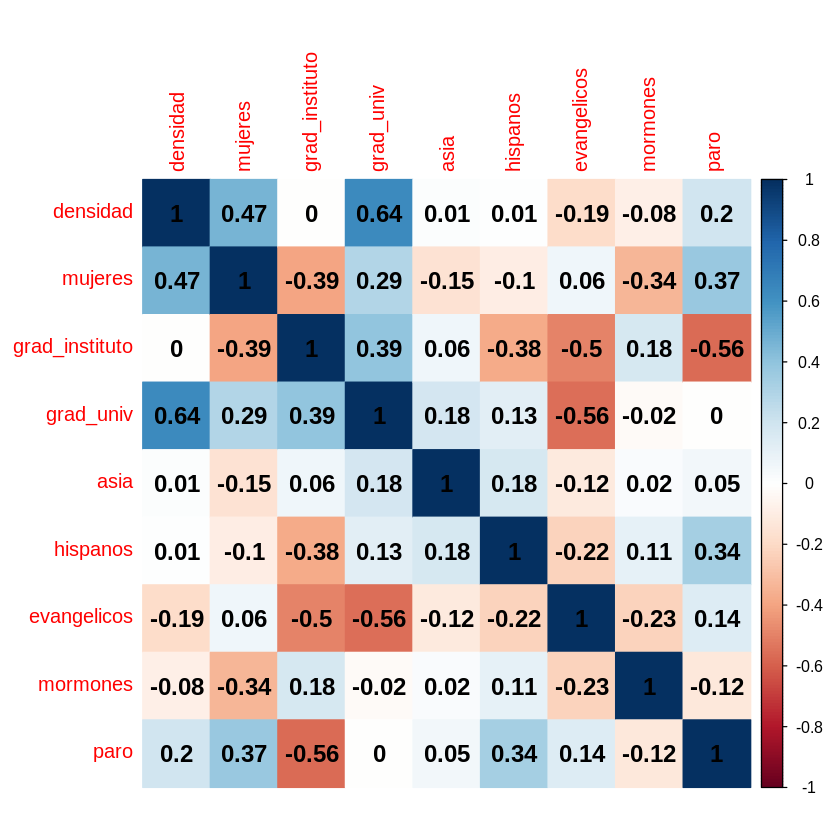

In [171]:
#install.packages("corrplot")
library(corrplot)
corrplot(cor_matrix, method = "color",
         addCoef.col = "black",  # Color of the annotations
         number.cex = 1.2)

**<u>Interpretación resultados</u>.-** La última matriz trata sobre la identificación del problema de multicolinealidad. Es decir, que exista relación entre las variables independientes. En este caso, vemos como en la mayoria de pares de variables el coeficiente de correlación es distinto de cero indicando la existencia de una relación entre las mismas. Luego, sería una `evidencia NEGATIVA`.

In [172]:
cor.test(xdata$evangelicos, xdata$densidad)


	Pearson's product-moment correlation

data:  xdata$evangelicos and xdata$densidad
t = -1.3348, df = 49, p-value = 0.1881
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.44016900  0.09308224
sample estimates:
       cor 
-0.1873062 


Por ejemplo entre evangelicos y la densidad el p valor es mayor de 0.05 por lo tanto confirmamos el problema de multicolinearidad

In [173]:
output = summary(mod_best)
summary(output$residuals)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1779  -2.0756   0.1336   0.0000   1.2912  15.6640 

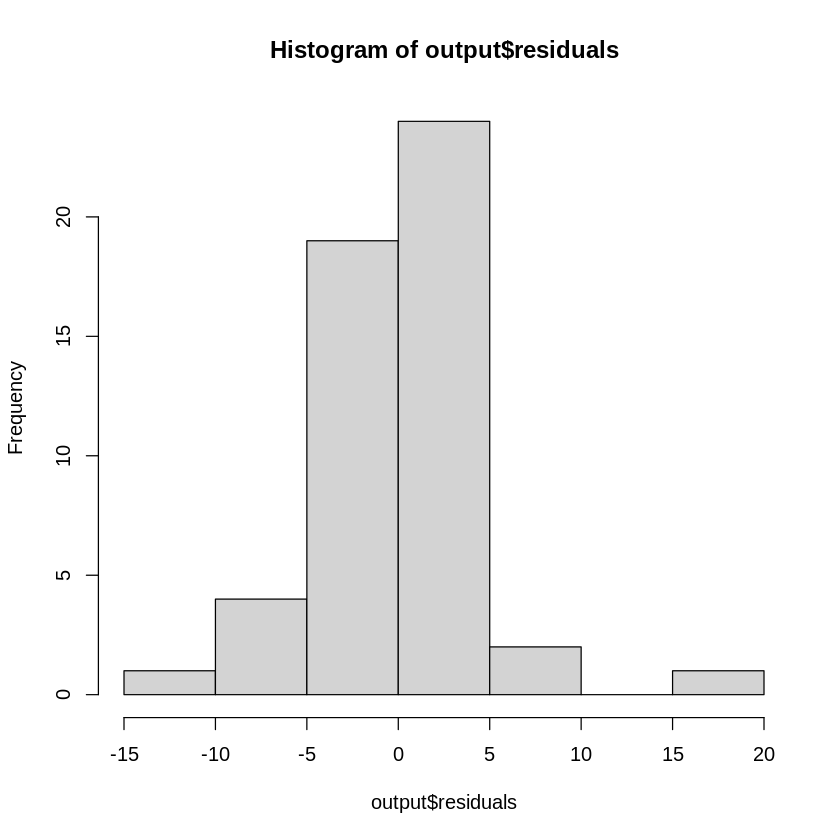

In [174]:
hist(output$residuals)

Se puede apreciar tanto del summary de los residuos como de este histograma la normalidad de estos y la homeostaticidad

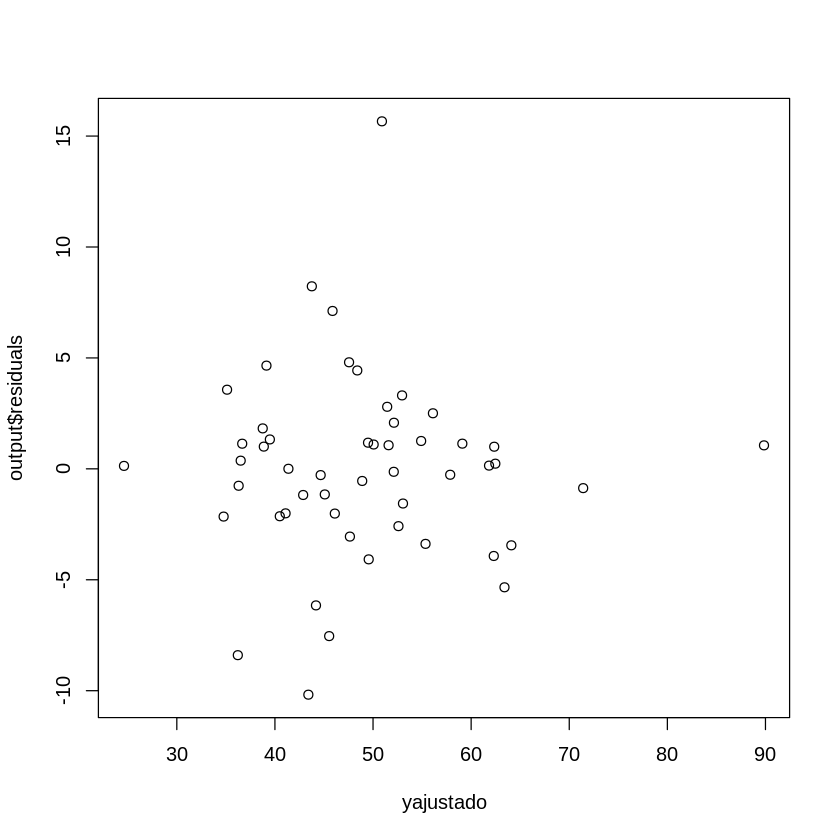

In [175]:
yajustado = wdata[, "obama"] - output$residuals
plot(yajustado, output$residuals)

No existe una clara correlacion entre los valores ajustados y los residuos


En este ejercicio hemos obtenido 1 evidencia positivas y 6 evidencias negativas por lo que en función de los resultados obtenidos del proceso de diagnosis gráfico de los residuos podemos afirmar que el mejor modelo seleccionado no sería del todo BUENO para explicar la variable porcentaje de votos que recibe obama por estado.

# Bloque 2: Ejercicios intermedios de la prueba <a id="topic3"></a>&nbsp;&nbsp;<a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>


### 04 Ejercicio [1.5 puntos]

Utilizando el archivo de datos `hatco.RData` que contiene observaciones de clientes de la compañía de distribución industrial Hatco S.L. Realizar un modelo de regresión lineal múltiple de la variable `fidedila` que representa el porcentaje de compra de los clientes de la empresa Hatco S.L. en función de las siguientes variables explicativas: `velocida` que representa la velocidad de entrega, la variable `precio` que representa el nivel de precios, la variable `flexprec` que representa la flexibilidad de precios, la variable `imgfabri` que representa la imagen del fabricante, la variable `imgfvent` que representa la imagen de fuerza de ventas y la variable `calidadp` que representa la calidad del producto. Responder a las siguientes cuestiones:

1. Ajustar el mejor modelo de regresión lineal múltiple posible con ese conjunto de variables
2. Comparar sus métricas y realizar la diagnosis del modelo de regresión lineal elegido
3. Realizar una interpretación de los coeficientes del modelo de regresión lineal elegido
4. Realizar la descomposición de valores ajustados y residuos del modelo de regresión lineal elegido
5. Evaluar e interpretar la bondad de ajuste del modelo de regresión lineal elegido ($R^2$ y $R^2_{adj}$)
6. Evaluar e interpretar la prueba de significatividad individual del modelo de regresión lineal elegido
7. Evaluar e interpretar la prueba de significatividad global del modelo de regresión lineal elegido
8. Evaluar e interpretar la multicolinealidad (existencia de relación lineal entre las variables independientes del modelo) usando la matriz de correlaciones

In [176]:
# Estoy realizando la tarea en google colab por eso el path es: "/content/hatco.RData"
load("/content/hatco.RData")

In [177]:
str(hatco)

'data.frame':	100 obs. of  16 variables:
 $ empresa : num  1 2 3 4 5 6 7 8 9 10 ...
 $ tamano  : Factor w/ 2 levels "peque\xf1a","grande": 1 2 2 2 1 2 1 2 1 2 ...
 $ adquisic: Factor w/ 2 levels "descentralizada",..: 1 2 2 2 1 2 1 2 1 2 ...
 $ tindustr: Factor w/ 2 levels "otras industrias",..: 2 1 2 2 2 2 2 1 2 1 ...
 $ tsitcomp: Factor w/ 3 levels "nueva tarea",..: 1 1 2 1 3 2 1 2 3 2 ...
 $ velocida: num  4.1 1.8 3.4 2.7 6 1.9 4.6 1.3 5.5 4 ...
 $ precio  : num  0.6 3 5.2 1 0.9 3.3 2.4 4.2 1.6 3.5 ...
 $ flexprec: num  6.9 6.3 5.7 7.1 9.6 7.9 9.5 6.2 9.4 6.5 ...
 $ imgfabri: num  4.7 6.6 6 5.9 7.8 4.8 6.6 5.1 4.7 6 ...
 $ servconj: num  2.4 2.5 4.3 1.8 3.4 2.6 3.5 2.8 3.5 3.7 ...
 $ imgfvent: num  2.3 4 2.7 2.3 4.6 1.9 4.5 2.2 3 3.2 ...
 $ calidadp: num  5.2 8.4 8.2 7.8 4.5 9.7 7.6 6.9 7.6 8.7 ...
 $ fidelida: num  32 43 48 32 58 45 46 44 63 54 ...
 $ satisfac: num  4.2 4.3 5.2 3.9 6.8 4.4 5.8 4.3 5.4 5.4 ...
 $ nfidelid: Factor w/ 3 levels "bajo","medio",..: 2 2 2 2 3 2 2 2 3 3 ...

In [178]:
class(hatco)

[1] "data.frame"

In [179]:
dim(hatco)

[1] 100  16

In [180]:
names(hatco)

[1] "empresa"  "tamano"   "adquisic" "tindustr" "tsitcomp" "velocida"
 [7] "precio"   "flexprec" "imgfabri" "servconj" "imgfvent" "calidadp"
[13] "fidelida" "satisfac" "nfidelid" "nsatisfa"

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [181]:
zdata=hatco[, c("fidelida", "velocida", "precio", "flexprec", "imgfabri", "imgfvent", "calidadp")]

In [182]:
wdata=na.omit(zdata)
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 100

[1] 99

In [183]:
# Visualizamos la base de datos seleccionada
head(wdata)

,fidelida,velocida,precio,flexprec,imgfabri,imgfvent,calidadp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,4.1,0.6,6.9,4.7,2.3,5.2
2,43,1.8,3.0,6.3,6.6,4.0,8.4
3,48,3.4,5.2,5.7,6.0,2.7,8.2
4,32,2.7,1.0,7.1,5.9,2.3,7.8
5,58,6.0,0.9,9.6,7.8,4.6,4.5
6,45,1.9,3.3,7.9,4.8,1.9,9.7


In [184]:
# 1º Tenemos que estimar el modelo con todas las variables
mod_full=lm(fidelida ~ ., data = wdata)
summary(mod_full)


Call:
lm(formula = fidelida ~ ., data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3728  -2.3908  -0.0508   2.8555   7.1305 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11.6219     4.8663  -2.388    0.019 *  
velocida      3.9750     0.4269   9.311 6.44e-15 ***
precio        3.6541     0.4578   7.981 3.94e-12 ***
flexprec      3.5417     0.4084   8.672 1.42e-13 ***
imgfabri      0.1011     0.6531   0.155    0.877    
imgfvent      1.4291     0.9438   1.514    0.133    
calidadp      0.4205     0.3527   1.192    0.236    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.39 on 92 degrees of freedom
Multiple R-squared:  0.7735,	Adjusted R-squared:  0.7587 
F-statistic: 52.36 on 6 and 92 DF,  p-value: < 2.2e-16


In [185]:
# 2º Búsqueda automática del modelo óptimo hacia atrás
step(mod_full,direction="backward")

Start:  AIC=299.64
fidelida ~ velocida + precio + flexprec + imgfabri + imgfvent + 
    calidadp

           Df Sum of Sq    RSS    AIC
- imgfabri  1      0.46 1773.3 297.66
- calidadp  1     27.38 1800.2 299.15
<none>                  1772.8 299.64
- imgfvent  1     44.18 1817.0 300.07
- precio    1   1227.44 3000.3 349.72
- flexprec  1   1449.20 3222.0 356.78
- velocida  1   1670.53 3443.4 363.36

Step:  AIC=297.66
fidelida ~ velocida + precio + flexprec + imgfvent + calidadp

           Df Sum of Sq    RSS    AIC
- calidadp  1     27.52 1800.8 297.19
<none>                  1773.3 297.66
- imgfvent  1    126.49 1899.8 302.48
- precio    1   1267.03 3040.3 349.04
- flexprec  1   1453.32 3226.6 354.92
- velocida  1   1687.80 3461.1 361.87

Step:  AIC=297.19
fidelida ~ velocida + precio + flexprec + imgfvent

           Df Sum of Sq    RSS    AIC
<none>                  1800.8 297.19
- imgfvent  1    155.01 1955.8 303.36
- flexprec  1   1425.81 3226.6 352.92
- precio    1   1462.22 326


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = wdata)

Coefficients:
(Intercept)     velocida       precio     flexprec     imgfvent  
     -8.007        3.808        3.805        3.469        1.676  


In [186]:
# 1º Tenemos que estimar el modelo más sencillo (modelo cte)
mod_cte= lm(fidelida~1,data=wdata)
summary(mod_cte)


Call:
lm(formula = fidelida ~ 1, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.2384  -7.2384   0.7616   7.2616  18.7616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  46.2384     0.8982   51.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.937 on 98 degrees of freedom


In [187]:
# 2º Búsqueda automática del modelo óptimo hacia delante
step(mod_cte,direction="forward",scope=list(lower=mod_cte, upper=mod_full)) # con forward hay que poner el scope

Start:  AIC=434.65
fidelida ~ 1

           Df Sum of Sq    RSS    AIC
+ velocida  1    3558.5 4268.2 376.62
+ flexprec  1    2615.5 5211.3 396.38
+ imgfvent  1     556.9 7269.9 429.34
+ imgfabri  1     394.2 7432.5 431.53
+ calidadp  1     325.8 7501.0 432.44
<none>                  7826.8 434.65
+ precio    1      46.2 7780.6 436.06

Step:  AIC=376.62
fidelida ~ velocida

           Df Sum of Sq    RSS    AIC
+ precio    1    892.61 3375.6 355.39
+ flexprec  1    557.97 3710.3 364.75
+ imgfvent  1    354.86 3913.4 370.03
+ imgfabri  1    287.66 3980.6 371.71
+ calidadp  1    164.23 4104.0 374.74
<none>                  4268.2 376.62

Step:  AIC=355.39
fidelida ~ velocida + precio

           Df Sum of Sq    RSS    AIC
+ flexprec  1   1419.79 1955.8 303.36
+ imgfvent  1    148.99 3226.6 352.92
<none>                  3375.6 355.39
+ imgfabri  1     65.93 3309.7 355.44
+ calidadp  1      4.68 3370.9 357.25

Step:  AIC=303.36
fidelida ~ velocida + precio + flexprec

           Df Sum of


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = wdata)

Coefficients:
(Intercept)     velocida       precio     flexprec     imgfvent  
     -8.007        3.808        3.805        3.469        1.676  


Como tanto backwards como forward obtenemos el mismo modelo con un AIC de 297.17, ese sera el mejor modelo que vamos a utilizar

In [188]:
# Definimos el modelo que mejor se ajusta a los datos
mod_best=lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, data = wdata)
summary(mod_best)


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


<div style="background-color:#5DADE2"><b>Apartado 2</b></div>

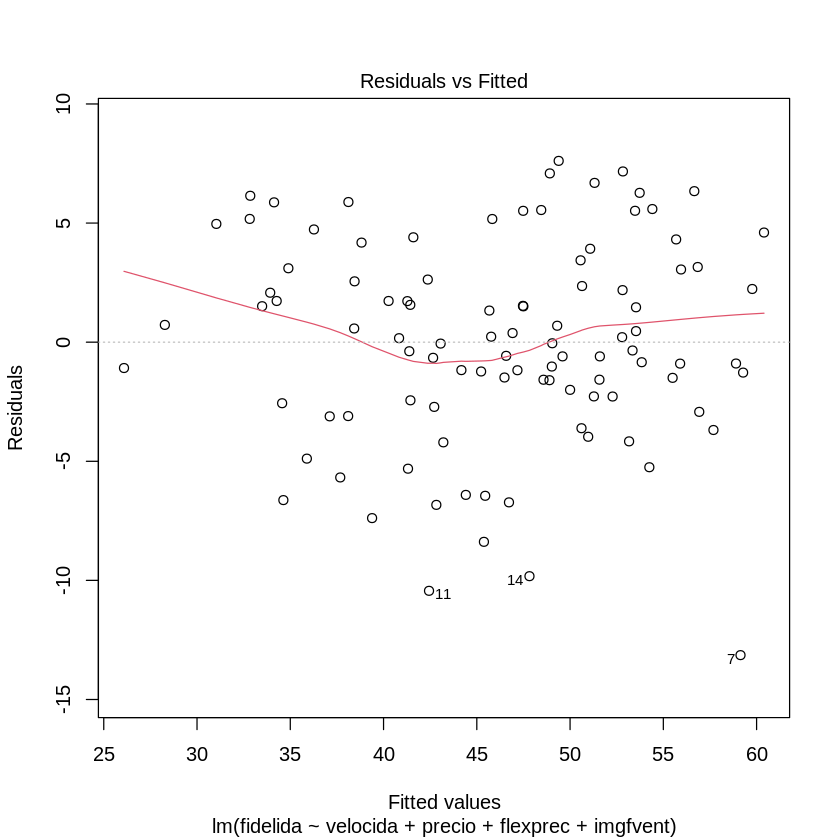

In [189]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_best, which=1)

**<u>Interpretación resultados</u>.-** La primera gráfica nos ayuda a decidir si las variables están linealmente relacionadas. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). Por tanto, para que sea una evidencia positiva esta gráfica debe de verse sin un patrón claro de asociación apareciendo todo cuadro del gráfico lleno de puntos, como se puede apreciar que pasa en este caso, luego sería una `evidencia POSITIVA`.

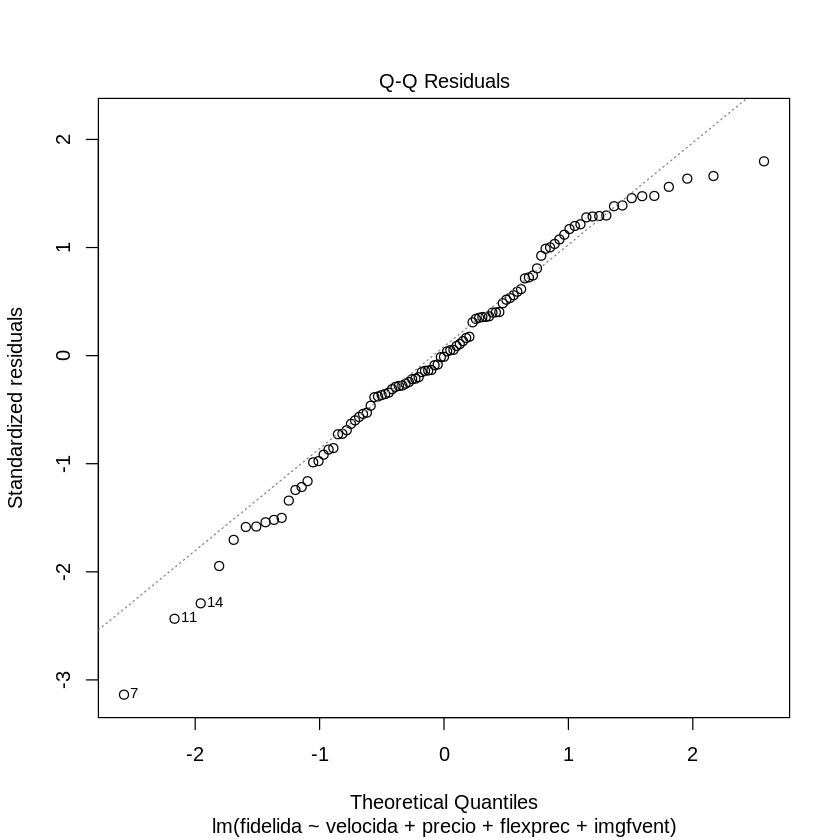

In [190]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_best, which=2)

**<u>Interpretación resultados</u>.-** La segunda es la gráfica de quantil-quantil sobre la normalidad de los residuos. Para que sea una `evidencia POSITIVA` en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos, como ocurre en este caso.

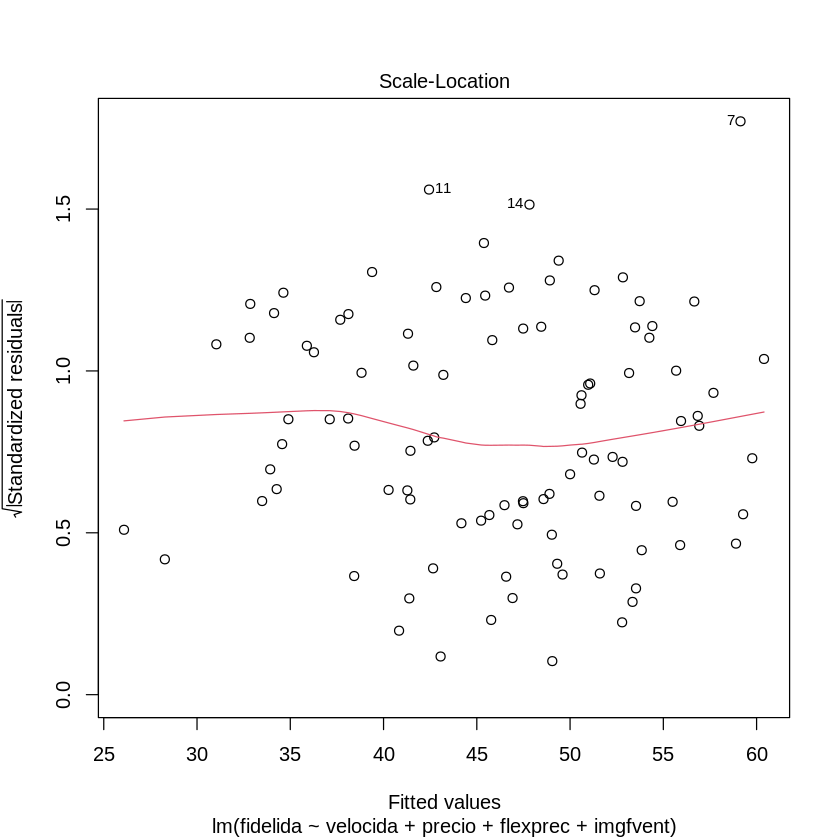

In [191]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_best, which=3)

**<u>Interpretación resultados</u>.-** La tercera gráfica es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la homocedasticidad de la varianza de los residuos. Para que sea una `evidencia POSITIVA` en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En este caso no es una linea perfecta pero si que se mantiene al rededor de la horizontalidad, por eso determino que es evidencia positiva


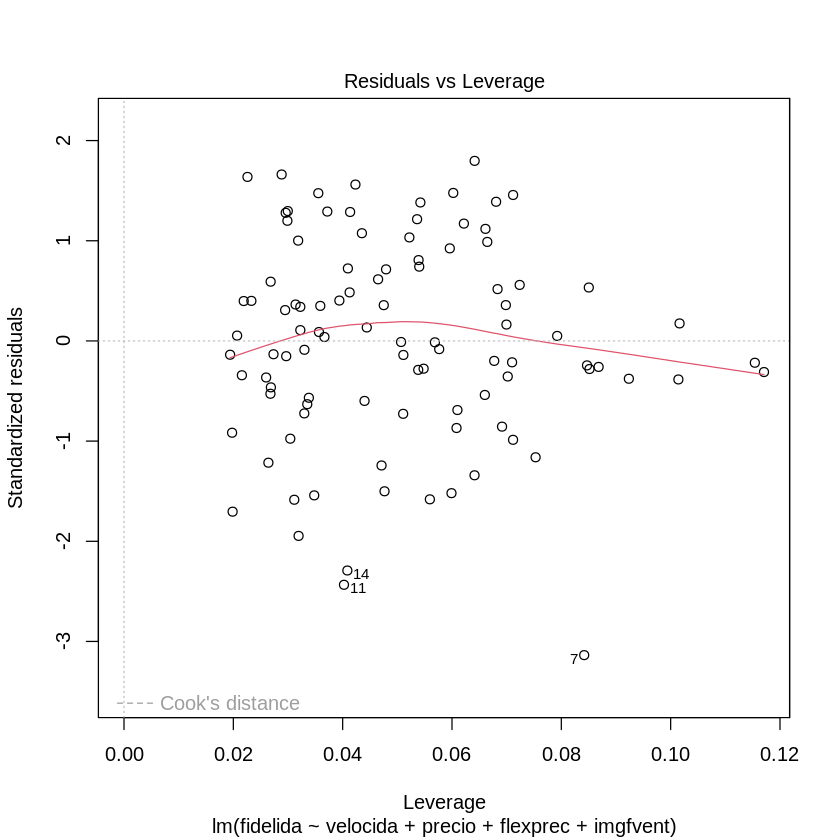

In [192]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_best, which=5)

**<u>Interpretación resultados</u>.-** La cuarta gráfica trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo:

* Las observaciones influyentes son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook.  

* Un punto aberrante es una observación que tiene un valor muy alto del residuo asociado. Para que sea una evidencia positiva en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha. En este caso, podemos ver como existe, al menos, un punto que incumple dicha condición. Luego, sería una `evidencia NEGATIVA`.


* Una observación con alto efecto palanca "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de exitir puntos con valores muy positivos y muy a la derecha.

In [193]:
xdata=wdata[, c("velocida", "precio", "flexprec", "imgfvent")]

In [194]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,velocida,precio,flexprec,imgfvent
velocida,1.00000000,-0.3543946,0.51879732,0.08084452
precio,-0.35439461,1.0000000,-0.48550163,0.18873090
flexprec,0.51879732,-0.4855016,1.00000000,-0.03801323
imgfvent,0.08084452,0.1887309,-0.03801323,1.00000000


**<u>Interpretación resultados</u>.-** La última matriz trata sobre la identificación del problema de multicolinealidad. Es decir, que exista relación entre las variables independientes. En este caso, vemos como en la mayoria de pares de variables el coeficiente de correlación es distinto de cero indicando la existencia de una relación entre las mismas. Luego, sería una `evidencia NEGATIVA`

En este ejercicio hemos obtenido 5 evidencia positivas y 2 evidencias negativas por lo que en función de los resultados obtenidos del proceso de diagnosis gráfico de los residuos podemos afirmar que el mejor modelo seleccionado ES BUENO para explicar la variable porcentaje de compra de los clientes.

<div style="background-color:#5DADE2"><b>Apartado 3</b></div>

In [195]:
# Hacemos un summary del modelo
output <- summary(mod_best)
output


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


**<u>Interpretación resultados</u>.-**  Veamos cada uno de los elementos que presenta el objeto `output`. Los valores de los **coeficientes de regresión** (columna `Estimate`) y los **errores típicos de los parámetros estimados** (columna Std. Error).

El estimador de la **desviación típica de los errores** $\sigma$ aparece como `Residual standard error` y su valor en este caso es igual a $4.377$ siendo $94$ el número de grados de libertad `degrees of freedom` que se calcula como el número total de obervaciones - número de parámetros estimados = $99 - 5 = 94$. En resumen, el modelo de regresión lineal simple para la ecuación de salarios una vez estimados los coeficientes de regresión quedaría del siguiente modo:

\begin{align*}
fidelida_{i}&=-8.0066 + 3.808 * velocida_{i} + 3.804 * precio_{i} + 3.468 * flexprec_{i} + 1.676 * imgfvent_{i} +\hat \epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [196]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-8.006609,3.6860311,-2.172149,3.236015e-02
velocida,3.808208,0.3989488,9.545605,1.700009e-15
precio,3.804574,0.4354810,8.736486,8.910446e-14
flexprec,3.468602,0.4020626,8.627021,1.520074e-13
imgfvent,1.676431,0.5893556,2.844515,5.458472e-03


In [197]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat <- coef(mod_best)
bhat

(Intercept)    velocida      precio    flexprec    imgfvent 
  -8.006609    3.808208    3.804574    3.468602    1.676431

In [198]:
# Cálculo manual de betas
y <- wdata[, 1]
X <- as.matrix(cbind(cte = 1, xdata))  # Llamo a la columna de 1s, cte.
head(cbind(y, X))

,y,cte,velocida,precio,flexprec,imgfvent
1,32,1,4.1,0.6,6.9,2.3
2,43,1,1.8,3.0,6.3,4.0
3,48,1,3.4,5.2,5.7,2.7
4,32,1,2.7,1.0,7.1,2.3
5,58,1,6.0,0.9,9.6,4.6
6,45,1,1.9,3.3,7.9,1.9


In [199]:
# Calculamos los coeficientes estimados utilizando las matrices obtenidas en el paso anterior
betas <- solve(t(X) %*% X) %*% t(X) %*% y
betas

cte,-8.006609
velocida,3.808208
precio,3.804574
flexprec,3.468602
imgfvent,1.676431


Con estas 2 ultimas celdas se ha calculado de manera manual los coeficientes que como se puede observar son los mismos que aparecian en el summary()

<div style="background-color:#5DADE2"><b>Apartado 4</b></div>

4.1 Valores ajustados de la variable dependiente

In [200]:
# Extracción directa de los valores ajustados de la variable dependiente
head(mod_best$fitted.values)

1        2        3        4        5        6 
37.67893 38.81980 49.02248 34.56299 59.27692 42.37126

In [201]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat <- fitted(mod_best)
head(yhat)

1        2        3        4        5        6 
37.67893 38.81980 49.02248 34.56299 59.27692 42.37126

In [202]:
# Cálculo manual de los valores ajustados
yajustado <- bhat[1]+bhat[2]*wdata$velocida+bhat[3]*wdata$precio+bhat[4]*wdata$flexprec+bhat[5]*wdata$imgfvent
head(yajustado)

[1] 37.67893 38.81980 49.02248 34.56299 59.27692 42.37126

In [203]:
# Cálculo manual de los valores ajustados (alternativa b)
yajustado1 <- bhat["(Intercept)"]+bhat["velocida"]*wdata$velocida+bhat["precio"]*wdata$precio+bhat["flexprec"]*wdata$flexprec+bhat["imgfvent"]*wdata$imgfvent
head(yajustado1)

[1] 37.67893 38.81980 49.02248 34.56299 59.27692 42.37126

**<u>Interpretación resultados</u>.-** Estos valores ajustados, (no confundir con valores predichos), son el resultado de aplicar la ecuación de regresión a los valores observados de la variable independiente. En términos prácticos, representan lo que el modelo anticipa que debería ser el numero de runs para un determinado numero de bateos. La interpretación de estos valores es directa: **indican el porcentaje de compras que puede esperarse, según el modelo, para una persona dado unos valores especificos del resto de variables**. La comparación de estos valores ajustados con los valores observados de runs permite evaluar la precisión y utilidad del modelo, que se llaman residuos.

4.2 Residuos estimados

In [204]:
# Extracción directa del valor de los residuos estimados
head(mod_best$residuals)

1         2         3         4         5         6 
-5.678934  4.180196 -1.022477 -2.562993 -1.276918  2.628744

In [205]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat <- resid(mod_best)
head(uhat)

1         2         3         4         5         6 
-5.678934  4.180196 -1.022477 -2.562993 -1.276918  2.628744

In [206]:
# Cálculo manual del valor de los residuos
residuos <- wdata$fidelida-yajustado
head(residuos)

[1] -5.678934  4.180196 -1.022477 -2.562993 -1.276918  2.628744

In [207]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(wdata$fidelida,yhat,yajustado,yajustado1,uhat,residuos))

,,yhat,yajustado,yajustado1,uhat,residuos
1,32,37.67893,37.67893,37.67893,-5.678934,-5.678934
2,43,38.81980,38.81980,38.81980,4.180196,4.180196
3,48,49.02248,49.02248,49.02248,-1.022477,-1.022477
4,32,34.56299,34.56299,34.56299,-2.562993,-2.562993
5,58,59.27692,59.27692,59.27692,-1.276918,-1.276918
6,45,42.37126,42.37126,42.37126,2.628744,2.628744


**<u>Interpretación resultados</u>.-** En este caso, los residuos representan la diferencia entre los valores observados en la fidelida y los valores predichos por el modelo. Estos residuos **son indicativos de la parte de la fidelida que no se puede explicar solo por las variables que se encuentran en el modelo**. Los residuos son pequeños y distribuidos aleatoriamente alrededor de cero lo que sugiere que el modelo se ajusta bien a los datos y que las variables independientes de este modelo son unos buenos predictores de la fidelida

<div style="background-color:#5DADE2"><b>Apartado 5</b></div>

5.1 Suma de cuadrados de los residuos

In [208]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 4.376934

In [209]:
# Extracción del valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(mod_best)/df.residual(mod_best))
ssr

[1] 4.376934

In [210]:
# Cálculo manual del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/df.residual(mod_best))
sigma

[1] 4.376934

**<u>Interpretación resultados</u>.-** La suma de cuadrados de los residuos (SSR) es una medida estadística que refleja la variabilidad en una variable dependiente, en este caso, la fidelida, que no es explicada por el modelo de regresión lineal simple. En el contexto de este modelo un SSR de $4.377$ indica la **cantidad total de variabilidad en la fidelida que no es capturada por el modelo**. Esta cifra indicaría que aunque las variables independientes consideradas tienen efecto sobre la fidelida hay factores adicionales, no considerados en el modelo actual.

5.2 Coeficientes de determinacion

In [211]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2=output$r.squared
R2

[1] 0.7699162

In [212]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = wdata$fidelida-mean(wdata$fidelida)
residuos2

[1] -14.2383838  -3.2383838   1.7616162 -14.2383838  11.7616162  -1.2383838
 [7]  -0.2383838  -2.2383838  16.7616162   7.7616162 -14.2383838   0.7616162
[13]  -7.2383838  -8.2383838   7.7616162   2.7616162  -8.2383838  -6.2383838
[19]   7.7616162   8.7616162  -5.2383838 -11.2383838   8.7616162 -10.2383838
[25]   2.7616162   2.7616162 -10.2383838   7.7616162   2.7616162  -0.2383838
[31]  -3.2383838   6.7616162  13.7616162   1.0616162 -11.2383838  -7.2383838
[37]  -2.2383838  -0.2383838 -17.2383838 -18.2383838  -6.2383838  11.7616162
[43]   6.7616162   1.7616162  -8.2383838   7.7616162   8.7616162  -3.2383838
[49]  10.7616162   6.7616162  -5.2383838   6.7616162   3.7616162 -14.2383838
[55]  -7.2383838   0.7616162  15.7616162  18.7616162  -0.2383838   3.7616162
[61]   7.7616162  13.7616162   0.7616162 -10.2383838  -6.2383838  -1.2383838
[67]  12.7616162  -0.2383838  11.7616162   2.7616162   3.7616162   8.7616162
[73]   4.7616162  13.7616162  -5.2383838   2.7616162  -4.2383838   0.7616162
[79]  -7.2383838   9.7616162  12.7616162   1.0616162  -5.2383838  -9.2383838
[85]   6.7616162  -3.2383838   4.7616162 -10.2383838 -12.2383838  13.7616162
[91]   2.7616162  -7.2383838  -3.2383838 -10.2383838 -15.2383838 -21.2383838
[97]  13.7616162  -8.2383838  -4.2383838

In [213]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1=1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.7699162

In [214]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(wdata$fidelida)
R2.2

[1] 0.7699162

In [215]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.7699162,0.7699162,0.7699162


**<u>Interpretación resultados</u>.-** El coeficiente de determinación $R^2$, es una medida fundamental en la interpretación de un modelo de regresión lineal simple. En este caso, donde la variable dependiente es la fidelida, un $R^2$ igual a $0.7699$ significa que aproximadamente el 76.99% de la **variabilidad en la fidelida puede ser explicada por la velocida, el precio, el flexprec y el imgfvent**. Este valor implica que hay una relacion muy clara entre la fidelida y las variables independientes escogidas, aunque habra otras variables que no se estan teniendo en cuenta que explican el otro 20 %

In [216]:
# Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj=output$adj.r.squared
R2adj

[1] 0.7601254

In [217]:
# Obtenemos R2 ajustado a través de su ecuación formal 1-(1-R2)*(n-1/n-k)
# k = número parámetros estimados
# n = número de observaciones
R2adj_2=1-(1-R2)*((99-1)/(99-4))
R2adj_2

[1] 0.7626504

<div style="background-color:#5DADE2"><b>Apartado 6</b></div>

In [218]:
# Obtenemos los p-valores de la prueba de significatividad individual
summary(mod_best)


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


La columna `t value` contiene el estadístico `t`, es decir, cociente entre cada estimador y su error típico. Estos cocientes son la base para llevar a cabo los **contrastes de significatividad individual sobre los parámetros estimados** cuya hipótesis nula y alternativa son $H_0:\hat{\beta}_{0}=0$, $H_0:\hat{\beta}_{1}=0$, $H_0:\hat{\beta}_{2}=0$, $H_0:\hat{\beta}_{3}=0$ y $H_0:\hat{\beta}_{4}=0$. Los correspondientes p-valores aparecen en la columna `Pr(>|t|)`. En este ejemplo, es muy pequeño (menor que el nivel de signifcación por defecto $5\%$) en todas las variables. Luego, se rechazaría la hipótesis nula y por tanto, sería estadísticamente significativo el coeficiente estimado para $\hat{\beta}_{0}$, $\hat{\beta}_{1}$, $\hat{\beta}_{2}$, $\hat{\beta}_{3}$ y $\hat{\beta}_{4}$.


<div style="background-color:#5DADE2"><b>Apartado 7</b></div>

In [219]:
# Obtenemos los p-valores de la prueba de significatividad individual
summary(mod_best)


Call:
lm(formula = fidelida ~ velocida + precio + flexprec + imgfvent, 
    data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1378  -2.3612  -0.0458   3.0770   7.6110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -8.0066     3.6860  -2.172  0.03236 *  
velocida      3.8082     0.3989   9.546 1.70e-15 ***
precio        3.8046     0.4355   8.736 8.91e-14 ***
flexprec      3.4686     0.4021   8.627 1.52e-13 ***
imgfvent      1.6764     0.5894   2.845  0.00546 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.377 on 94 degrees of freedom
Multiple R-squared:  0.7699,	Adjusted R-squared:  0.7601 
F-statistic: 78.64 on 4 and 94 DF,  p-value: < 2.2e-16


**<u>Interpretación resultados</u>.-** En este caso, realizamos el contraste de **significatividad global** del conjunto de parámetros $\beta^{'s}$ siendo la hipótesis nula $H_0:\beta_0=\beta_1=\beta_2=\beta_3=\beta_4$. En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que el nivel de significación fijado por defecto ($5\%$). Lo que implica que los valores de los coeficientes son diferentes entre sí. Aunque ya lo habíamos comprobado utilizando el contraste de significatividad individual, obtenemos una doble evidencia, validando los resultados anteriores y dotando de mayor robustez a los mismos.

<div style="background-color:#5DADE2"><b>Apartado 8</b></div>

In [220]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,velocida,precio,flexprec,imgfvent
velocida,1.00000000,-0.3543946,0.51879732,0.08084452
precio,-0.35439461,1.0000000,-0.48550163,0.18873090
flexprec,0.51879732,-0.4855016,1.00000000,-0.03801323
imgfvent,0.08084452,0.1887309,-0.03801323,1.00000000


In [221]:
cor.test(xdata$flexprec,xdata$imgfvent)


	Pearson's product-moment correlation

data:  xdata$flexprec and xdata$imgfvent
t = -0.37466, df = 97, p-value = 0.7087
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2336715  0.1606038
sample estimates:
        cor 
-0.03801323 


In [222]:
cor.test(xdata$precio,xdata$imgfvent)


	Pearson's product-moment correlation

data:  xdata$precio and xdata$imgfvent
t = 1.8928, df = 97, p-value = 0.06137
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.00901687  0.37227270
sample estimates:
      cor 
0.1887309 


In [223]:
cor.test(xdata$velocida,xdata$imgfvent)


	Pearson's product-moment correlation

data:  xdata$velocida and xdata$imgfvent
t = 0.79884, df = 97, p-value = 0.4263
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1184579  0.2738852
sample estimates:
       cor 
0.08084452 


In [224]:
cor.test(xdata$velocida,xdata$flexprec)


	Pearson's product-moment correlation

data:  xdata$velocida and xdata$flexprec
t = 5.9768, df = 97, p-value = 3.775e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3580565 0.6496719
sample estimates:
      cor 
0.5187973 


In [225]:
cor.test(xdata$precio,xdata$flexprec)


	Pearson's product-moment correlation

data:  xdata$precio and xdata$flexprec
t = -5.4695, df = 97, p-value = 3.515e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6231851 -0.3186283
sample estimates:
       cor 
-0.4855016 


In [226]:
cor.test(xdata$precio,xdata$velocida)


	Pearson's product-moment correlation

data:  xdata$precio and xdata$velocida
t = -3.7326, df = 97, p-value = 0.0003195
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5157254 -0.1687917
sample estimates:
       cor 
-0.3543946 


**<u>Interpretación resultados</u>.-** Los $p$-valores obtenidos entre las variables velocida, precio y flexprec son todos menores que 5%, sin embargo todos los p valores relacionados con imgfvent son mayores del 5%. Aunque cabe destacar que la correlacion de imgfvent con flexprec y con la velocida es casi nula. Pero si que es cierto que entre el precio y el imgfvent hay evidencias de que existe un problema de multicolinealidad

### 05 Ejercicio [1.5 puntos]

En este ejercicio deberéis de <u>crear vuestra propia función de R</u> con el objetivo de automatizar el proceso de ajuste de un modelo de regresión lineal múltiple a un conjunto de datos de sección cruzada dado. Es decir, tenéis que replicar la función `lm` de la librería $\tt stats$. Una vez creada, comparar los resultados obtenidos con la propia función `lm` utilizando alguna de las bases de datos propias de las librerías de R teniendo en cuenta los principales objetos de la salida de los modelos: output de la regresión, coeficientes de regresión estimados, residuos estimados, grados de libertad, etc.

Para aplicar a un ejemplo la función que diseñéis podéis utilizar cualquier base de datos disponible en las precargadas de R.

In [227]:
data(package = .packages(all.available = TRUE))

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 05</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1</b></div>

In [249]:
# Funcion que toma la variable dependiente (response_var), un vector de variables
# independientes (predictor_vars) y un dataframe al que pertenezcan todas estas

my_lm <- function(response_var, predictor_vars, data) {
  y <- data[, response_var]
  X <- as.matrix(cbind(cte = 1, data[, predictor_vars]))  # Llamo a la columna de 1s, cte.

  # calcular coeficientes de cada columna
  coefficients <- solve(t(X) %*% X) %*% t(X) %*% y

  xdata = data[, predictor_vars]

  # calcular residuos
  for (i in 1:(length(predictor_vars) + 1)) {
    if (i == 1) {
      yajustado <- 0
      yajustado <- yajustado + coefficients[i]
    } else {
      yajustado <- yajustado + coefficients[i] * xdata[, i - 1]
    }
  }
  residuos <- y-yajustado

  # gdl
  n = nrow(data)
  k = (length(predictor_vars) + 1)
  gdl = n - k

  # suma de cuadrado de los residuos
  resi2 = (residuos)^2
  sigma = sqrt(sum(resi2)/gdl)

  # standard error
  varcov2 = sigma^2 * solve(t(X) %*% X)
  se2 = sqrt(diag(varcov2))

  # t values
  t_values = coefficients/se2

  # p-values
  p_values <- 2 * (1 - pt(abs(t_values), gdl))

  # coeficientes de determinacion
  residuos2 = y-mean(y)
  R2.1 = 1-(sum(resi2)/sum((residuos2)^2))

  # F
  Fs = (R2.1/(k-1))/((1-R2.1)/(n-k))

  # Global p value
  p_value <- pf(Fs, (k-1), gdl, lower.tail = FALSE)

  # Coefficients dataframe
  coefficients_df <- data.frame(
  estimate = coefficients,
  stde = se2,
  tvalue = t_values,
  pvalues = p_values
  )
  # Creo una lista a la que voy a ir añadiendo todos los elemento que ha calculado para poder
  # acceder a cada uno a traves del "$"
  model = list()
  model$coefficients = coefficients_df
  model$residaul_std_error = sigma
  model$gdl = gdl
  model$r2 = R2.1
  model$Fstadistico = Fs
  model$p_value = p_value

  # Imito el print statement que ocurre cuando ejecutas una lm()
  formula_str <- paste(response_var, "~", paste(predictor_vars, collapse = " + "))
  call_str <- paste("Call: lm(formula =", formula_str, ",", "data =", deparse(substitute(data)), ")")
  print(call_str)

  return(model)
}

In [250]:
# Load the mtcars dataset
data(mtcars)

# Using your custom function (my_lm)
custom_model <- my_lm(response_var = "mpg", predictor_vars = c("wt", "hp"), data = mtcars)

# Using lm function
lm_model <- lm(mpg ~ wt + hp, data = mtcars)

# Compare the coefficients
print("Custom Model:")
print(custom_model)

print("lm Model:")
print(summary(lm_model))

[1] "Call: lm(formula = mpg ~ wt + hp , data = mtcars )"
[1] "Custom Model:"
$coefficients
       estimate       stde    tvalue      pvalues
cte 37.22727012 1.59878754 23.284689 0.000000e+00
wt  -3.87783074 0.63273349 -6.128695 1.119647e-06
hp  -0.03177295 0.00902971 -3.518712 1.451229e-03

$residaul_std_error
[1] 2.593412

$gdl
[1] 29

$r2
[1] 0.8267855

$Fstadistico
[1] 69.21121

$p_value
[1] 9.109054e-12

[1] "lm Model:"

Call:
lm(formula = mpg ~ wt + hp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 2

Como se puede apreciar todos los elementos de la funcion my_lm son iguales que los del summary del modelo lm

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>